In [ ]:
pip install ipyvolume

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pygal

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from datetime import date, timedelta
import pygal
import ipyvolume as ipv
import matplotlib as mplt
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits import mplot3d
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [ ]:
# Import du dataset

%cd "Chemin vers le Dataset"

df_olist_customers = pd.read_csv("olist_customers_dataset.csv", sep=",")
df_olist_geolocalisation = pd.read_csv("olist_geolocation_dataset.csv", sep=",")
df_olist_order_items = pd.read_csv("olist_order_items_dataset.csv", sep=",")
df_olist_order_payments = pd.read_csv("olist_order_payments_dataset.csv", sep=",")
df_olist_order_reviews_dataset = pd.read_csv("olist_order_reviews_dataset.csv", sep=",")
df_olist_orders_dataset = pd.read_csv("olist_orders_dataset.csv", sep=",")
df_olist_products = pd.read_csv("olist_products_dataset.csv", sep=",")
df_olist_sellers = pd.read_csv("olist_sellers_dataset.csv", sep=",")
df_olist_products_category_name_translation = pd.read_csv(
    "product_category_name_translation.csv", sep=","
)

C:\Users\33769\OneDrive\Bureau\DataScientist\Projets\Projet_5


In [ ]:
pd.set_option("display.max_columns", 40)

In [ ]:
df_olist_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
df_olist_geolocalisation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
df_olist_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
df_olist_order_items["shipping_limit_date"] = pd.to_datetime(
    df_olist_order_items["shipping_limit_date"]
)
df_olist_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
df_olist_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
df_olist_order_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
df_olist_order_reviews_dataset["review_creation_date"] = pd.to_datetime(
    df_olist_order_reviews_dataset["review_creation_date"]
)
df_olist_order_reviews_dataset["review_answer_timestamp"] = pd.to_datetime(
    df_olist_order_reviews_dataset["review_answer_timestamp"]
)
df_olist_order_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [ ]:
df_olist_orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
df_olist_orders_dataset["order_purchase_timestamp"] = pd.to_datetime(
    df_olist_orders_dataset["order_purchase_timestamp"]
)
df_olist_orders_dataset["order_approved_at"] = pd.to_datetime(
    df_olist_orders_dataset["order_approved_at"]
)
df_olist_orders_dataset["order_delivered_carrier_date"] = pd.to_datetime(
    df_olist_orders_dataset["order_delivered_carrier_date"]
)
df_olist_orders_dataset["order_delivered_customer_date"] = pd.to_datetime(
    df_olist_orders_dataset["order_delivered_customer_date"]
)
df_olist_orders_dataset["order_estimated_delivery_date"] = pd.to_datetime(
    df_olist_orders_dataset["order_estimated_delivery_date"]
)
df_olist_orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [ ]:
df_olist_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
df_olist_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
df_olist_products_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


## Traduction des noms de catégories

In [ ]:
df_olist_products = pd.merge(
    df_olist_products,
    df_olist_products_category_name_translation,
    on="product_category_name",
    indicator=True,
)

In [ ]:
df_olist_products["_merge"].value_counts()

both          32328
left_only         0
right_only        0
Name: _merge, dtype: int64

In [ ]:
del df_olist_products["product_category_name"]
del df_olist_products["_merge"]

## Jonction des différents datasets

![shema_olist_bdd.png](attachment:4be0540c-9ca6-43a8-9da9-2bf96e92dd2e.png)

### Commandes-items-produits

In [ ]:
df_olist_order_items_products = pd.merge(
    df_olist_order_items, df_olist_products, on="product_id", indicator=True
)

In [ ]:
df_olist_order_items_products["_merge"].value_counts()

both          111023
left_only          0
right_only         0
Name: _merge, dtype: int64

In [ ]:
del df_olist_order_items_products["_merge"]

### Commandes-clients

In [ ]:
df_olist_orders_customer = pd.merge(
    df_olist_orders_dataset, df_olist_customers, on="customer_id", indicator=True
)

In [ ]:
df_olist_orders_customer["_merge"].value_counts()

both          99441
left_only         0
right_only        0
Name: _merge, dtype: int64

In [ ]:
del df_olist_orders_customer["_merge"]

### Commandes avis

In [ ]:
df_olist_orders_reviews_customers = pd.merge(
    df_olist_orders_customer,
    df_olist_order_reviews_dataset,
    on="order_id",
    indicator=True,
)

In [ ]:
df_olist_orders_reviews_customers["_merge"].value_counts()

both          99224
left_only         0
right_only        0
Name: _merge, dtype: int64

In [ ]:
del df_olist_orders_reviews_customers["_merge"]

### Commande-paiment

In [ ]:
df_olist_orders_reviews_customers_payments = pd.merge(
    df_olist_orders_reviews_customers,
    df_olist_order_payments,
    on="order_id",
    indicator=True,
)

In [ ]:
df_olist_orders_reviews_customers_payments["_merge"].value_counts()

both          103677
left_only          0
right_only         0
Name: _merge, dtype: int64

In [ ]:
del df_olist_orders_reviews_customers_payments["_merge"]

### Commande-Produits

In [ ]:
df_olist_complet = pd.merge(
    df_olist_orders_reviews_customers_payments,
    df_olist_order_items_products,
    on="order_id",
    indicator=True,
)

In [ ]:
df_olist_complet["_merge"].value_counts()

both          115609
left_only          0
right_only         0
Name: _merge, dtype: int64

In [ ]:
del df_olist_complet["_merge"]

## Dataset complet

In [ ]:
df_olist_complet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115609 non-null  object        
 1   customer_id                    115609 non-null  object        
 2   order_status                   115609 non-null  object        
 3   order_purchase_timestamp       115609 non-null  datetime64[ns]
 4   order_approved_at              115595 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114414 non-null  datetime64[ns]
 6   order_delivered_customer_date  113209 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115609 non-null  datetime64[ns]
 8   customer_unique_id             115609 non-null  object        
 9   customer_zip_code_prefix       115609 non-null  int64         
 10  customer_city                  115609 non-null  object        
 11  

In [ ]:
del df_olist_complet["review_comment_title"]
del df_olist_complet["review_comment_message"]
del df_olist_complet["freight_value"]
del df_olist_complet["product_name_lenght"]
del df_olist_complet["product_description_lenght"]
del df_olist_complet["product_photos_qty"]
del df_olist_complet["product_length_cm"]
del df_olist_complet["product_weight_g"]
del df_olist_complet["product_height_cm"]
del df_olist_complet["product_width_cm"]
del df_olist_complet["payment_type"]
del df_olist_complet["payment_sequential"]

In [ ]:
df_olist_complet.describe()

,customer_zip_code_prefix,review_score,payment_installments,payment_value,order_item_id,price
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,35061.537597,4.034409,2.946233,172.387379,1.194535,120.619850
std,29841.671732,1.385584,2.781087,265.873969,0.685926,182.653476
min,1003.000000,1.000000,0.000000,0.000000,1.000000,0.850000
25%,11310.000000,4.000000,1.000000,60.870000,1.000000,39.900000
50%,24241.000000,5.000000,2.000000,108.050000,1.000000,74.900000
75%,58745.000000,5.000000,4.000000,189.480000,1.000000,134.900000
max,99980.000000,5.000000,24.000000,13664.080000,21.000000,6735.000000


In [ ]:
df_olist_complet.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_creation_date,review_answer_timestamp,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4,2018-08-08,2018-08-08 18:37:50,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5,2018-08-18,2018-08-22 19:07:58,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,auto
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5,2017-12-03,2017-12-05 19:21:58,1,72.20,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,pet_shop
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5,2018-02-17,2018-02-18 13:02:51,1,28.62,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,stationery
7,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,89b738e70a1ce346db29a20fb2910161,4,2017-07-27,2017-07-27 22:48:30,6,175.26,1,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,2017-07-13 22:10:13,147.90,auto
8,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,RJ,07d67dd06ed5f88bef11ef6b464e79ae,5,2017-05-27,2017-05-28 02:59:57,3,75.16,1,4520766ec412348b8d4caa5e8a18c464,16090f2ca825584b5a147ab24aa30c

In [ ]:
df_olist_complet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115609 non-null  object        
 1   customer_id                    115609 non-null  object        
 2   order_status                   115609 non-null  object        
 3   order_purchase_timestamp       115609 non-null  datetime64[ns]
 4   order_approved_at              115595 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114414 non-null  datetime64[ns]
 6   order_delivered_customer_date  113209 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115609 non-null  datetime64[ns]
 8   customer_unique_id             115609 non-null  object        
 9   customer_zip_code_prefix       115609 non-null  int64         
 10  customer_city                  115609 non-null  object        
 11  

### Exploration dartaset complet

#### variables temporelles

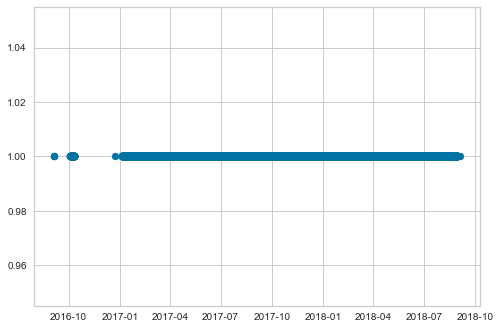

In [ ]:
plt.scatter(
    df_olist_complet["order_purchase_timestamp"],
    y=np.linspace(1, 1, len(df_olist_complet["order_purchase_timestamp"])),
)

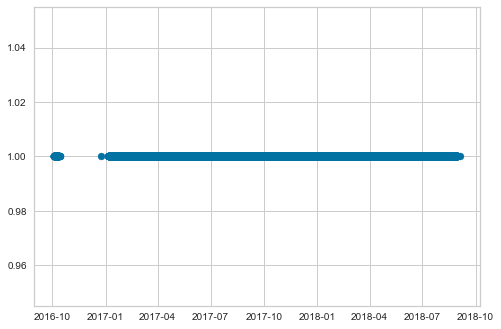

In [ ]:
plt.scatter(
    df_olist_complet["order_approved_at"],
    y=np.linspace(1, 1, len(df_olist_complet["order_approved_at"])),
)

Il y a un arret entre fin 2016 et  debut 2017, surement dû à un arret temporaire de l'entreprise, pour supprimer ce gap et eviter un clustering sur ce gap nous augmenterons toutes les variables temporelles liées à des commandes des valeurs d'avant le gap de la durée de ce gap

In [ ]:
pd.set_option("display.max_rows", 500)
df_gap = df_olist_complet[df_olist_complet["order_purchase_timestamp"] < "2017/01/15"]
df_gap["order_purchase_timestamp"].sort_values(ascending=True)

5217     2016-09-04 21:15:19
5216     2016-09-04 21:15:19
5058     2016-09-05 00:15:34
96475    2016-10-02 22:07:52
108435   2016-10-03 09:44:50
33138    2016-10-03 16:56:50
107668   2016-10-03 21:01:41
113847   2016-10-03 21:13:36
102752   2016-10-03 22:06:03
7793     2016-10-03 22:31:31
72079    2016-10-03 22:44:10
39066    2016-10-03 22:51:30
74316    2016-10-04 09:16:33
77850    2016-10-04 09:59:03
41800    2016-10-04 10:16:04
86170    2016-10-04 10:41:17
9799     2016-10-04 11:03:14
37394    2016-10-04 12:06:11
18962    2016-10-04 12:53:17
91504    2016-10-04 13:02:10
68592    2016-10-04 13:11:29
68593    2016-10-04 13:11:29
28811    2016-10-04 13:15:46
98426    2016-10-04 13:15:52
97839    2016-10-04 13:16:57
113344   2016-10-04 13:22:56
113345   2016-10-04 13:22:56
113346   2016-10-04 13:22:56
113343   2016-10-04 13:22:56
113342   2016-10-04 13:22:56
113341   2016-10-04 13:22:56
113340   2016-10-04 13:22:56
66153    2016-10-04 13:30:13
28178    2016-10-04 13:38:37
96176    2016-

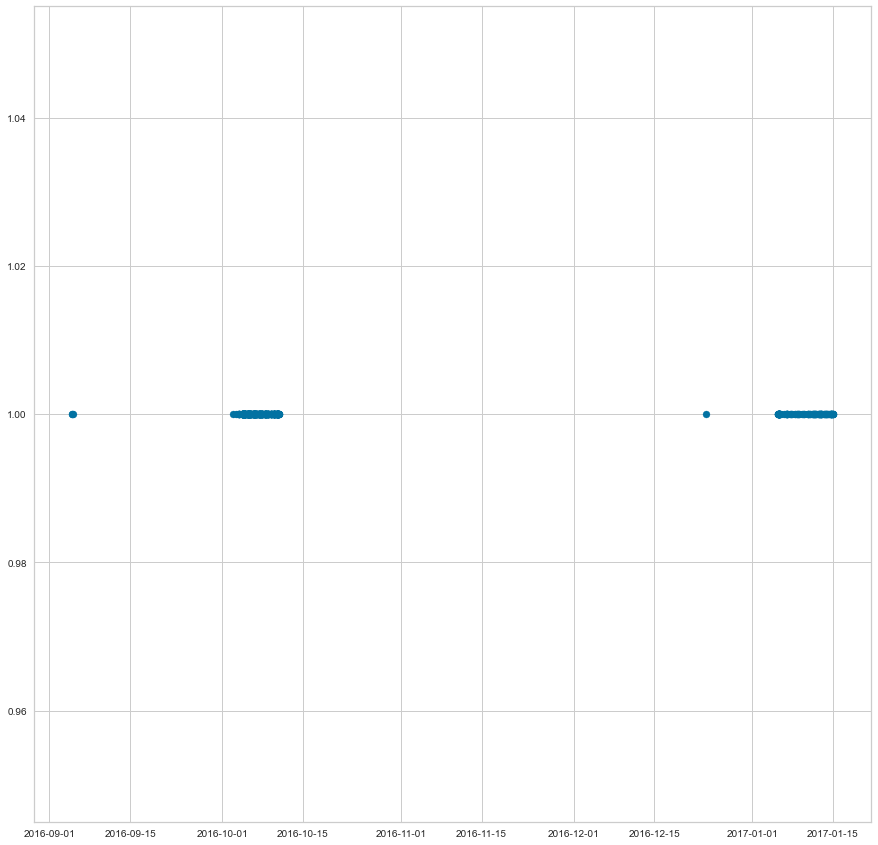

In [ ]:
plt.figure(figsize=(15, 15))
plt.scatter(
    df_gap["order_purchase_timestamp"],
    y=np.linspace(1, 1, len(df_gap["order_purchase_timestamp"])),
)

##### Suppression des gaps temporels dûs au démarrage du site

In [ ]:
date(2016, 10, 2) - date(2016, 9, 5)

datetime.timedelta(days=27)

In [ ]:
date(2016, 12, 23) - date(2016, 10, 2)

datetime.timedelta(days=82)

In [ ]:
date(2017, 1, 5) - date(2016, 12, 23)

datetime.timedelta(days=13)

In [ ]:
# Liste des variables temporelles à décaler
# (les écarts de temps entre celles ci étant
# les caracteristiques nous interessant)
# ce décalage n'aura pas d'influence sur la qualité de notre analyse RFM :

# 1er gap

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/12/23", "order_approved_at"
] = df_olist_complet["order_approved_at"] + timedelta(days=27)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/9/6",
    "order_delivered_carrier_date",
] = df_olist_complet["order_delivered_carrier_date"] + timedelta(days=27)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/9/6",
    "order_delivered_customer_date",
] = df_olist_complet["order_delivered_customer_date"] + timedelta(days=27)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/9/6",
    "order_estimated_delivery_date",
] = df_olist_complet["order_estimated_delivery_date"] + timedelta(days=27)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/9/6", "review_creation_date"
] = df_olist_complet["review_creation_date"] + timedelta(days=27)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/9/6", "review_answer_timestamp"
] = df_olist_complet["review_answer_timestamp"] + timedelta(days=27)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/9/6", "shipping_limit_date"
] = df_olist_complet["shipping_limit_date"] + timedelta(days=27)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/9/6",
    "order_purchase_timestamp",
] = df_olist_complet["order_purchase_timestamp"] + timedelta(days=27)


# 2d gap

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/12/23", "order_approved_at"
] = df_olist_complet["order_approved_at"] + timedelta(days=82)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/12/23",
    "order_delivered_carrier_date",
] = df_olist_complet["order_delivered_carrier_date"] + timedelta(days=82)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/12/23",
    "order_delivered_customer_date",
] = df_olist_complet["order_delivered_customer_date"] + timedelta(days=82)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/12/23",
    "order_estimated_delivery_date",
] = df_olist_complet["order_estimated_delivery_date"] + timedelta(days=82)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/12/23", "review_creation_date"
] = df_olist_complet["review_creation_date"] + timedelta(days=82)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/12/23",
    "review_answer_timestamp",
] = df_olist_complet["review_answer_timestamp"] + timedelta(days=82)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/12/23", "shipping_limit_date"
] = df_olist_complet["shipping_limit_date"] + timedelta(days=82)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/12/23",
    "order_purchase_timestamp",
] = df_olist_complet["order_purchase_timestamp"] + timedelta(days=82)


# 3eme gap

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2017/1/5", "order_approved_at"
] = df_olist_complet["order_approved_at"] + timedelta(days=13)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2017/1/5",
    "order_delivered_carrier_date",
] = df_olist_complet["order_delivered_carrier_date"] + timedelta(days=13)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2017/1/5",
    "order_delivered_customer_date",
] = df_olist_complet["order_delivered_customer_date"] + timedelta(days=13)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2017/1/5",
    "order_estimated_delivery_date",
] = df_olist_complet["order_estimated_delivery_date"] + timedelta(days=13)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2017/1/5", "review_creation_date"
] = df_olist_complet["review_creation_date"] + timedelta(days=13)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2017/1/5", "review_answer_timestamp"
] = df_olist_complet["review_answer_timestamp"] + timedelta(days=13)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2017/1/5", "shipping_limit_date"
] = df_olist_complet["shipping_limit_date"] + timedelta(days=13)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2017/1/5",
    "order_purchase_timestamp",
] = df_olist_complet["order_purchase_timestamp"] + timedelta(days=13)

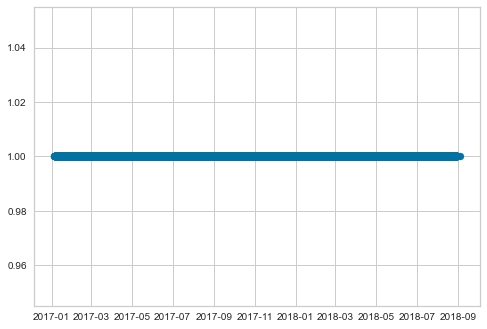

In [ ]:
plt.scatter(
    df_olist_complet["order_purchase_timestamp"],
    y=np.linspace(1, 1, len(df_olist_complet["order_purchase_timestamp"])),
)

## Recence

In [ ]:
df_recence = (
    df_olist_complet[["customer_unique_id", "order_approved_at"]]
    .groupby(by="customer_unique_id")
    .max()
)

In [ ]:
df_recence.reset_index(inplace=True)
df_recence.rename(columns={"order_approved_at": "last_order_datetime"}, inplace=True)

In [ ]:
df_recence

,customer_unique_id,last_order_datetime
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52
...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:15:16
93392,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:16:20
93393,ffff371b4d645b6ecea244b27531430a,2017-02-07 16:02:44
93394,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:58:47


In [ ]:
df_recence["customer_unique_id"].nunique()

93396

## Frequence (nombre d'achats)

In [ ]:
df_olist_complet["order_id"].describe()

count                               115609
unique                               96516
top       895ab968e7bb0d5659d16cd74cd1650c
freq                                    63
Name: order_id, dtype: object

In [ ]:
df_frequence = (
    df_olist_complet[["customer_unique_id", "order_id"]]
    .groupby(by="customer_unique_id")
    .count()
)
df_frequence.rename(columns={"order_id": "orders_count"}, inplace=True)

In [ ]:
df_frequence = df_frequence.reset_index()
df_frequence

,customer_unique_id,orders_count
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,2
93392,fffea47cd6d3cc0a88bd621562a9d061,1
93393,ffff371b4d645b6ecea244b27531430a,1
93394,ffff5962728ec6157033ef9805bacc48,1


In [ ]:
df_frequence["orders_count"].value_counts()

1     79377
2     10227
3      1973
4       940
5       337
6       294
7        70
8        45
10       25
9        25
12       25
11       17
14        8
15        7
24        7
13        4
21        3
20        3
18        1
22        1
26        1
16        1
38        1
19        1
29        1
75        1
35        1
Name: orders_count, dtype: int64

In [ ]:
df_frequence.loc[df_frequence["orders_count"] == 10]

,customer_unique_id,orders_count
3671,09e9991c50513a303a2da26619870d7f,10
3972,0aadc1d26d1c8b88a52c39a533ccea93,10
10077,1b6c7548a2a1f9037c1fd3ddfed95f33,10
10768,1d37df739a7cdbd28609dc2954cc2c75,10
10935,1da09dd64e235e7c2f29a4faff33535c,10
11054,1dedbe50138a3540d30fe355776d2d6a,10
11984,20a5257c01689ac69410a14cb51bb447,10
17978,310647380793836bfa5b7b6b3f518423,10
20772,38a4f1deb45ca914dd13c73b41775d71,10
22441,3d47f4368ccc8e1bb4c4a12dbda7111b,10


## Montant (montant du dernier achat et montant total dépensé par le client)

In [ ]:
df_olist_complet

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_creation_date,review_answer_timestamp,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4,2018-08-08,2018-08-08 18:37:50,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5,2018-08-18,2018-08-22 19:07:58,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,29bb71b2760d0f876dfa178a76bc4734,4,2018-03-01,2018-03-02 17:50:01,3,195.00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,baby
115605,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,371579771219f6db2d830d50805977bb,5,2017-09-22,2017-09-22 23:10:57,5,271.01,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,home_appliances_2
115606,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,8ab6855b9fe9b812cd03a480a25058a1,2,2018-01-26,2018-01-27 09:16:56,4,441.16,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,computers_accessories
115607,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,8ab6855b9fe9

In [ ]:
df_olist_complet["order_id"].nunique()

96516

In [ ]:
df_olist_complet["customer_unique_id"].nunique()

93396

In [ ]:
df_montant_1 = df_olist_complet.groupby(by="customer_unique_id").max(
    "order_approved_at"
)

In [ ]:
df_montant_1

,customer_zip_code_prefix,review_score,payment_installments,payment_value,order_item_id,price
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,7787,5,8,141.90,1,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,6053,4,1,27.19,1,18.90
0000f46a3911fa3c0805444483337064,88115,3,8,86.22,1,69.00
0000f6ccb0745a6a4b88665a16c9f078,66812,4,4,43.62,1,25.99
0004aac84e0df4da2b147fca70cf8255,18040,5,6,196.89,1,180.00
...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,55250,5,10,2067.42,2,890.00
fffea47cd6d3cc0a88bd621562a9d061,44054,4,1,84.58,1,64.89
ffff371b4d645b6ecea244b27531430a,78552,5,1,112.46,1,89.90


In [ ]:
df_montant_1 = df_montant_1.reset_index()

In [ ]:
df_montant_1 = df_montant_1[["customer_unique_id", "payment_value"]]
df_montant_1

,customer_unique_id,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42
93392,fffea47cd6d3cc0a88bd621562a9d061,84.58
93393,ffff371b4d645b6ecea244b27531430a,112.46
93394,ffff5962728ec6157033ef9805bacc48,133.69


In [ ]:
df_montant_1.rename(columns={"payment_value": "payment_value_last"}, inplace=True)
df_montant_1

,customer_unique_id,payment_value_last
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42
93392,fffea47cd6d3cc0a88bd621562a9d061,84.58
93393,ffff371b4d645b6ecea244b27531430a,112.46
93394,ffff5962728ec6157033ef9805bacc48,133.69


In [ ]:
df_montant_2 = df_olist_complet.groupby(
    by=["customer_unique_id", "order_approved_at"]
).sum()

In [ ]:
df_montant_2

,,customer_zip_code_prefix,review_score,payment_installments,payment_value,order_item_id,price
customer_unique_id,order_approved_at,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18,7787,5,8,141.90,1,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44,6053,4,1,27.19,1,18.90
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,88115,3,8,86.22,1,69.00
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17,66812,4,4,43.62,1,25.99
0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52,18040,5,6,196.89,1,180.00
...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:15:16,110500,10,20,4134.84,3,1570.00
fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:16:20,44054,4,1,84.58,1,64.89
ffff371b4d645b6ecea244b27531430a,2017-02-07 16:02:44,78552,5,1,112.46,1,89.90


In [ ]:
df_montant_2 = df_montant_2.reset_index()

In [ ]:
df_montant_2["customer_unique_id"].nunique()

93384

In [ ]:
df_montant_2.sort_values(by="order_approved_at", ascending=False)
df_montant_2.drop_duplicates(subset="customer_unique_id", keep="first", inplace=True)
df_montant_2

,customer_unique_id,order_approved_at,customer_zip_code_prefix,review_score,payment_installments,payment_value,order_item_id,price
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18,7787,5,8,141.90,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44,6053,4,1,27.19,1,18.90
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,88115,3,8,86.22,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17,66812,4,4,43.62,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52,18040,5,6,196.89,1,180.00
...,...,...,...,...,...,...,...,...
96420,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:15:16,110500,10,20,4134.84,3,1570.00
96421,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:16:20,44054,4,1,84.58,1,64.89
96422,ffff371b4d645b6ecea244b27531430a,2017-02-07 16:02:44,78552,5,1,112.46,1,89.90
96423,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:58:47,29460,5,5,133.69,1,115.00


In [ ]:
df_montant_2["customer_unique_id"].nunique()

93384

In [ ]:
df_montant_2 = df_montant_2[["customer_unique_id", "payment_value"]]
df_montant_2.rename(columns={"payment_value": "payment_value_total"}, inplace=True)
df_montant_2

C:\Users\33769\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,customer_unique_id,payment_value_total
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
96420,fffcf5a5ff07b0908bd4e2dbc735a684,4134.84
96421,fffea47cd6d3cc0a88bd621562a9d061,84.58
96422,ffff371b4d645b6ecea244b27531430a,112.46
96423,ffff5962728ec6157033ef9805bacc48,133.69


### Note moyenne

In [ ]:
df_note = (
    df_olist_complet[["customer_unique_id", "review_score"]]
    .groupby(by=["customer_unique_id"])
    .mean()
)
df_note = df_note.reset_index()
df_note

,customer_unique_id,review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0
2,0000f46a3911fa3c0805444483337064,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,4.0
4,0004aac84e0df4da2b147fca70cf8255,5.0
...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,5.0
93392,fffea47cd6d3cc0a88bd621562a9d061,4.0
93393,ffff371b4d645b6ecea244b27531430a,5.0
93394,ffff5962728ec6157033ef9805bacc48,5.0


### Temps moyen de livraison

In [ ]:
df_olist_complet["shipping_time_delay"] = (
    df_olist_complet["order_delivered_customer_date"]
    - df_olist_complet["order_estimated_delivery_date"]
)
df_olist_complet["shipping_time_delay"]

0         -8 days +21:25:13
1         -8 days +21:25:13
2         -8 days +21:25:13
3         -6 days +15:27:45
4        -18 days +18:06:29
                ...        
115604    -2 days +17:37:56
115605    -6 days +11:24:17
115606   -21 days +23:32:54
115607   -21 days +23:32:54
115608   -18 days +13:08:30
Name: shipping_time_delay, Length: 115609, dtype: timedelta64[ns]

In [ ]:
df_delta_livraison = (
    df_olist_complet[["customer_unique_id", "shipping_time_delay"]]
    .groupby(by=["customer_unique_id"])
    .mean()
)
df_delta_livraison = df_delta_livraison.reset_index()
df_delta_livraison

,customer_unique_id,shipping_time_delay
0,0000366f3b9a7992bf8c76cfdf3221e2,-5 days +20:48:37
1,0000b849f77a49e4a4ce2b2a4ca5be3f,-5 days +18:02:42
2,0000f46a3911fa3c0805444483337064,-2 days +14:38:47
3,0000f6ccb0745a6a4b88665a16c9f078,-12 days +21:23:05
4,0004aac84e0df4da2b147fca70cf8255,-8 days +23:08:56
...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,-27 days +09:22:00
93392,fffea47cd6d3cc0a88bd621562a9d061,-3 days +22:28:20
93393,ffff371b4d645b6ecea244b27531430a,-30 days +12:45:04
93394,ffff5962728ec6157033ef9805bacc48,-14 days +11:54:26


### Dataframe RFM

In [ ]:
df_recence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93396 entries, 0 to 93395
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_unique_id   93396 non-null  object        
 1   last_order_datetime  93384 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 1.4+ MB


In [ ]:
df_frequence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93396 entries, 0 to 93395
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_unique_id  93396 non-null  object
 1   orders_count        93396 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [ ]:
df_montant_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93396 entries, 0 to 93395
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  93396 non-null  object 
 1   payment_value_last  93396 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.4+ MB


In [ ]:
df_montant_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93384 entries, 0 to 96424
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_unique_id   93384 non-null  object 
 1   payment_value_total  93384 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.1+ MB


In [ ]:
df_delta_livraison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93396 entries, 0 to 93395
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   customer_unique_id   93396 non-null  object         
 1   shipping_time_delay  91479 non-null  timedelta64[ns]
dtypes: object(1), timedelta64[ns](1)
memory usage: 1.4+ MB


In [ ]:
df_note.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93396 entries, 0 to 93395
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  93396 non-null  object 
 1   review_score        93396 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.4+ MB


In [ ]:
df_RFM = pd.merge(df_recence, df_frequence, on="customer_unique_id", indicator=True)
df_RFM["_merge"].value_counts()

both          93396
left_only         0
right_only        0
Name: _merge, dtype: int64

In [ ]:
del df_RFM["_merge"]

In [ ]:
df_RFM = pd.merge(df_RFM, df_montant_1, on="customer_unique_id", indicator=True)
df_RFM["_merge"].value_counts()

both          93396
left_only         0
right_only        0
Name: _merge, dtype: int64

In [ ]:
del df_RFM["_merge"]

In [ ]:
df_RFM = pd.merge(df_RFM, df_montant_2, on="customer_unique_id", indicator=True)
df_RFM["_merge"].value_counts()

both          93384
left_only         0
right_only        0
Name: _merge, dtype: int64

In [ ]:
del df_RFM["_merge"]

In [ ]:
df_RFM = pd.merge(df_RFM, df_delta_livraison, on="customer_unique_id", indicator=True)
df_RFM["_merge"].value_counts()

both          93384
left_only         0
right_only        0
Name: _merge, dtype: int64

In [ ]:
del df_RFM["_merge"]

In [ ]:
df_RFM = pd.merge(df_RFM, df_note, on="customer_unique_id", indicator=True)
df_RFM["_merge"].value_counts()

both          93384
left_only         0
right_only        0
Name: _merge, dtype: int64

In [ ]:
del df_RFM["_merge"]

In [ ]:
df_RFM

,customer_unique_id,last_order_datetime,orders_count,payment_value_last,payment_value_total,shipping_time_delay,review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18,1,141.90,141.90,-5 days +20:48:37,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44,1,27.19,27.19,-5 days +18:02:42,4.0
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,86.22,86.22,-2 days +14:38:47,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17,1,43.62,43.62,-12 days +21:23:05,4.0
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52,1,196.89,196.89,-8 days +23:08:56,5.0
...,...,...,...,...,...,...,...
93379,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:15:16,2,2067.42,4134.84,-27 days +09:22:00,5.0
93380,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:16:20,1,84.58,84.58,-3 days +22:28:20,4.0
93381,ffff371b4d645b6ecea244b27531430a,2017-02-07 16:02:44,1,112.46,112.46,-30 days +12:45:04,5.0
93382,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:58:47,1,133.69,133.69,-14 days +11:54:26,5.0


### Preprocessing datetimes

In [ ]:
df_RFM["shipping_time_delay"] = df_RFM[
    "shipping_time_delay"] / pd.to_timedelta(1, unit="D"
)

In [ ]:
df_olist_complet["order_purchase_timestamp"].max()

Timestamp('2018-09-03 09:06:57')

In [ ]:
df_RFM["last_order_datetime_delta"] = (
    df_olist_complet["order_purchase_timestamp"].max() - df_RFM[
        "last_order_datetime"]
)

In [ ]:
df_RFM["last_order_datetime_delta"] = df_RFM[
    "last_order_datetime_delta"
] / pd.to_timedelta(1, unit="D")

In [ ]:
del df_RFM["last_order_datetime"]

## Exploration df_RFM

In [ ]:
df_RFM.describe()

,orders_count,payment_value_last,payment_value_total,shipping_time_delay,review_score,last_order_datetime_delta
count,93384.000000,93384.000000,93384.000000,91467.000000,93384.000000,93384.000000
mean,1.237857,160.951084,206.035240,-11.197169,4.104394,241.535433
std,0.847587,219.964305,612.498275,10.074142,1.324852,152.157429
min,1.000000,4.070000,9.590000,-146.016123,1.000000,-0.356354
25%,1.000000,61.820000,62.997500,-16.237535,4.000000,117.924086
50%,1.000000,105.280000,109.920000,-11.921736,5.000000,222.543681
75%,1.000000,177.862500,196.520000,-6.413808,5.000000,350.735362
max,75.000000,13664.080000,109312.640000,188.975081,5.000000,605.702558


In [ ]:
df_RFM.corr()

,orders_count,payment_value_last,payment_value_total,shipping_time_delay,review_score,last_order_datetime_delta
orders_count,1.000000,0.116804,0.328108,-0.028443,-0.077173,0.007184
payment_value_last,0.116804,1.000000,0.659325,-0.019748,-0.047155,-0.001979
payment_value_total,0.328108,0.659325,1.000000,-0.015216,-0.063540,-0.000847
shipping_time_delay,-0.028443,-0.019748,-0.015216,1.000000,-0.267370,-0.095490
review_score,-0.077173,-0.047155,-0.063540,-0.267370,1.000000,-0.018047
last_order_datetime_delta,0.007184,-0.001979,-0.000847,-0.095490,-0.018047,1.000000


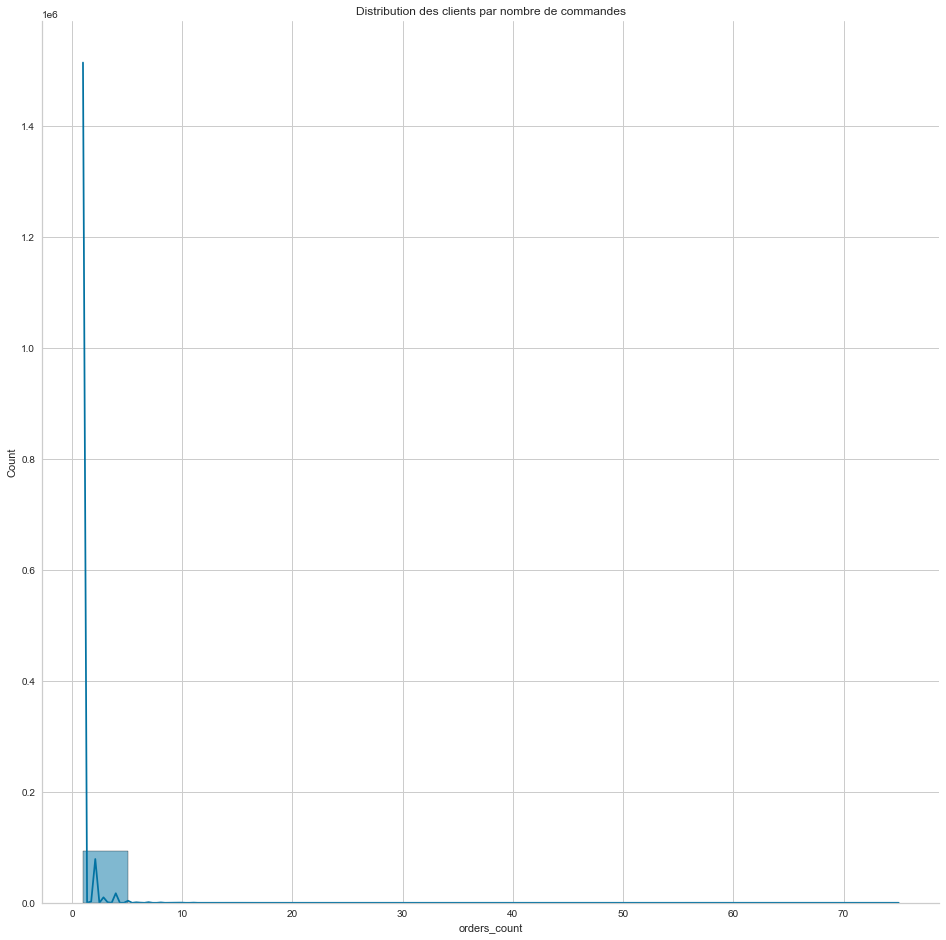

In [ ]:
ax = sns.displot(df_RFM["orders_count"], kde=True).set(
    title="Distribution des clients par nombre de commandes"
)
ax.fig.set_figwidth(15)
ax.fig.set_figheight(15)

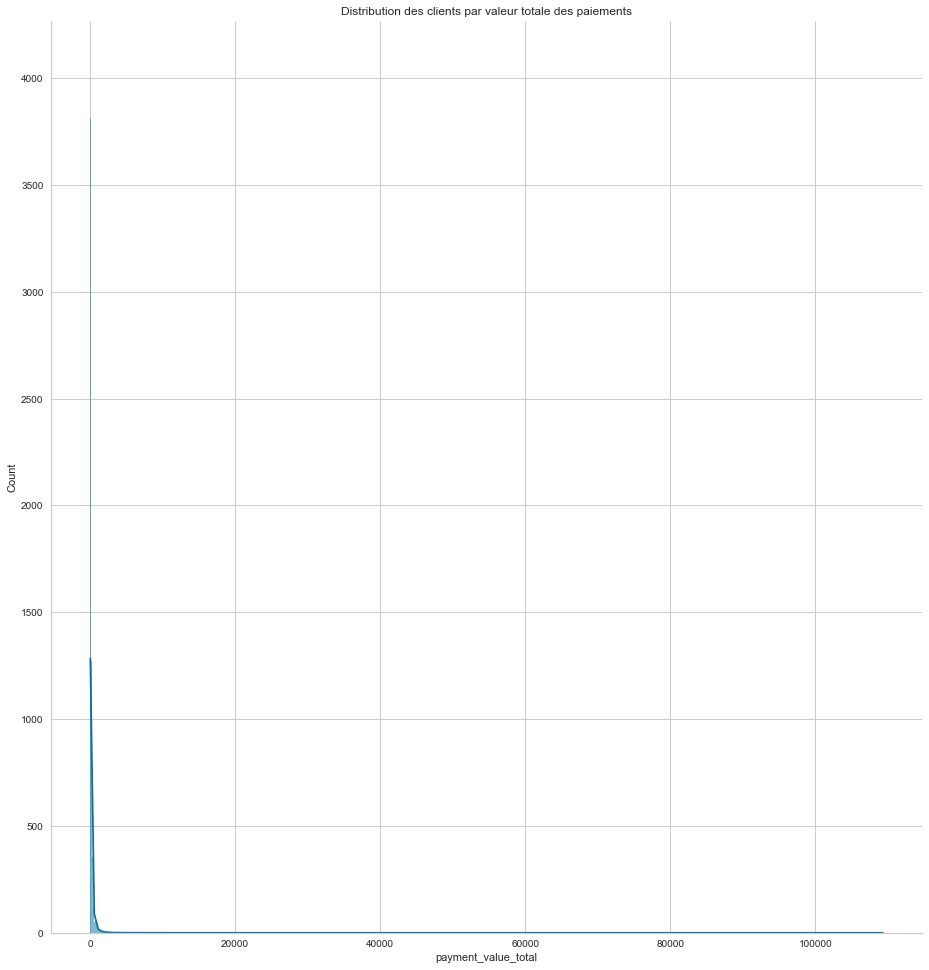

In [ ]:
ax = sns.displot(df_RFM["payment_value_total"], kde=True).set(
    title="Distribution des clients par valeur totale des paiements"
)
ax.fig.set_figwidth(15)
ax.fig.set_figheight(15)

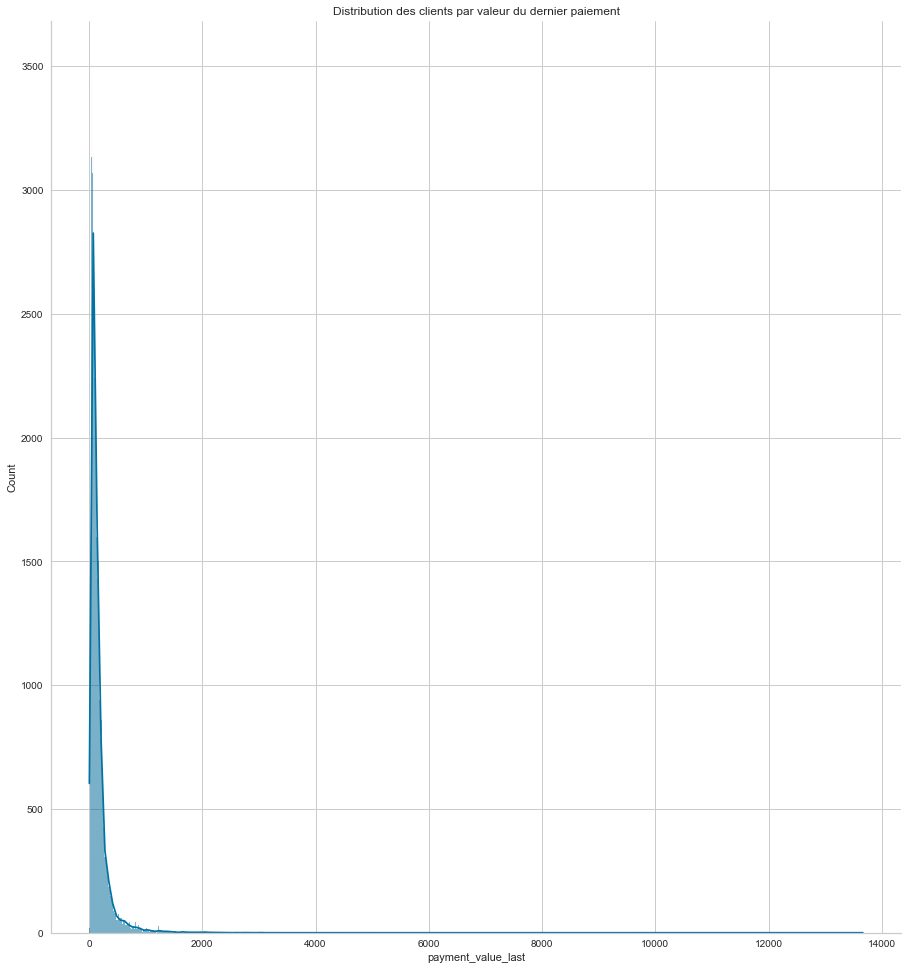

In [ ]:
ax = sns.displot(df_RFM["payment_value_last"], kde=True).set(
    title="Distribution des clients par valeur du dernier paiement"
)
ax.fig.set_figwidth(15)
ax.fig.set_figheight(15)

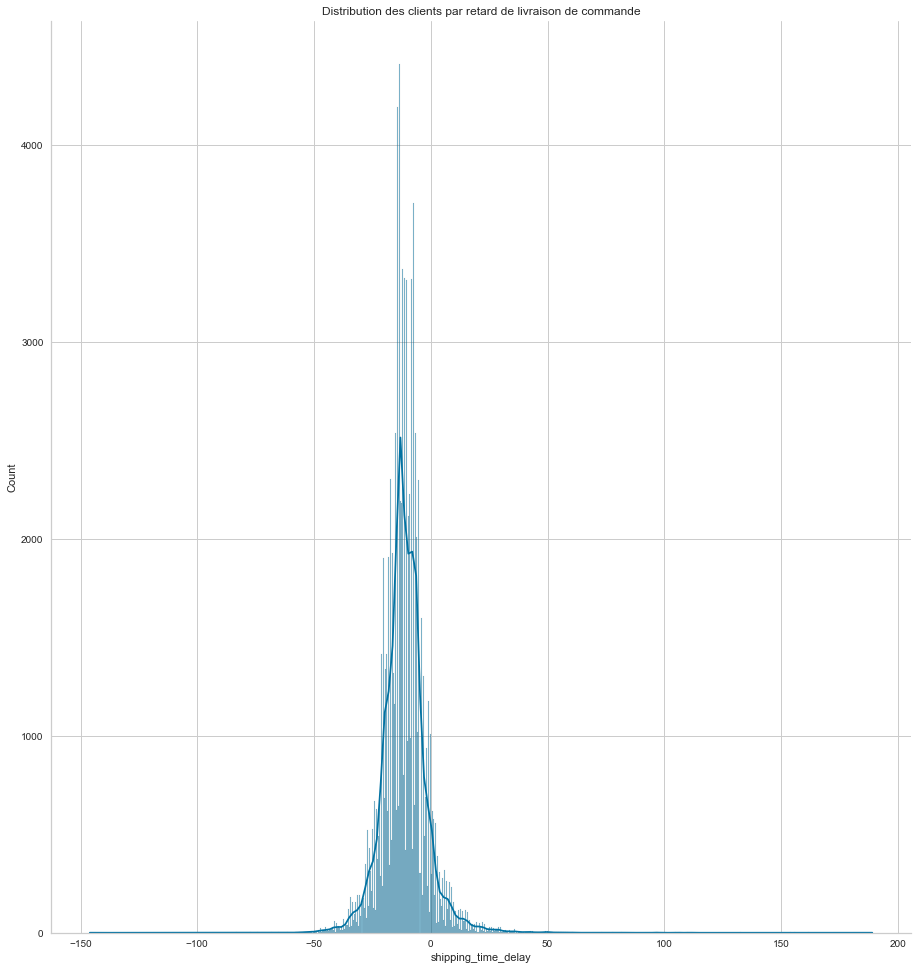

In [ ]:
ax = sns.displot(df_RFM["shipping_time_delay"], kde=True).set(
    title="Distribution des clients par retard de livraison de commande"
)
ax.fig.set_figwidth(15)
ax.fig.set_figheight(15)

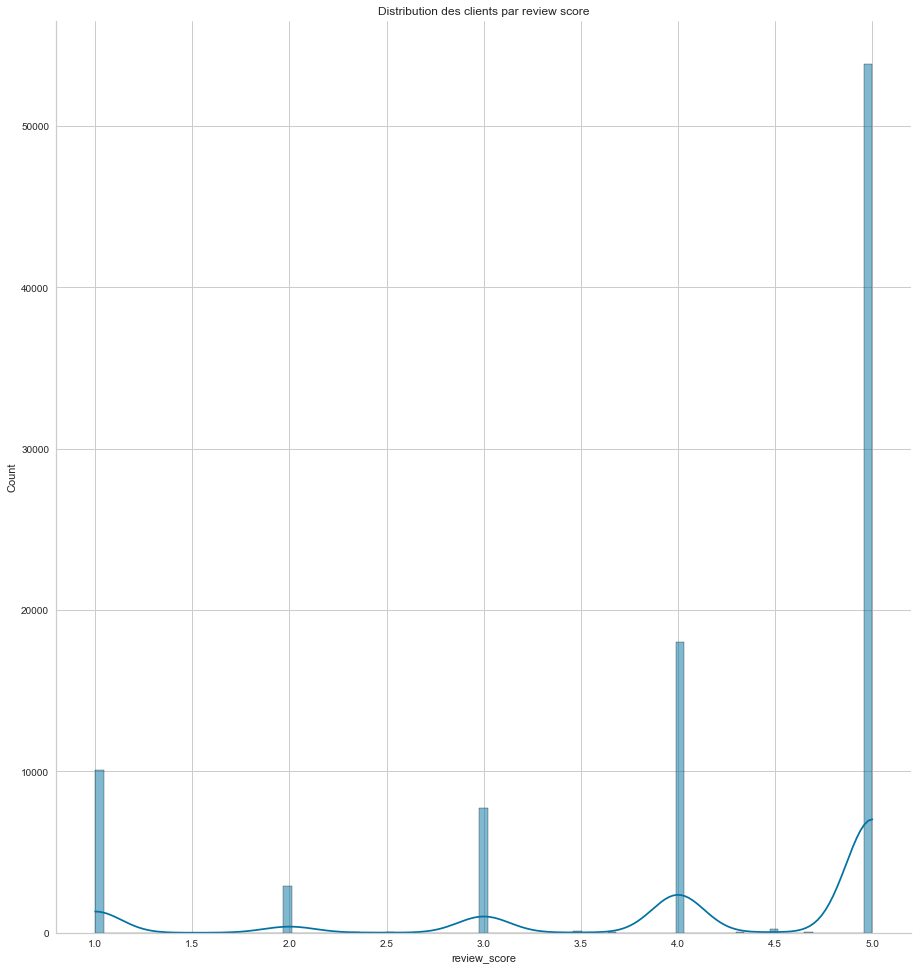

In [ ]:
ax = sns.displot(df_RFM["review_score"], kde=True).set(
    title="Distribution des clients par review score"
)
ax.fig.set_figwidth(15)
ax.fig.set_figheight(15)

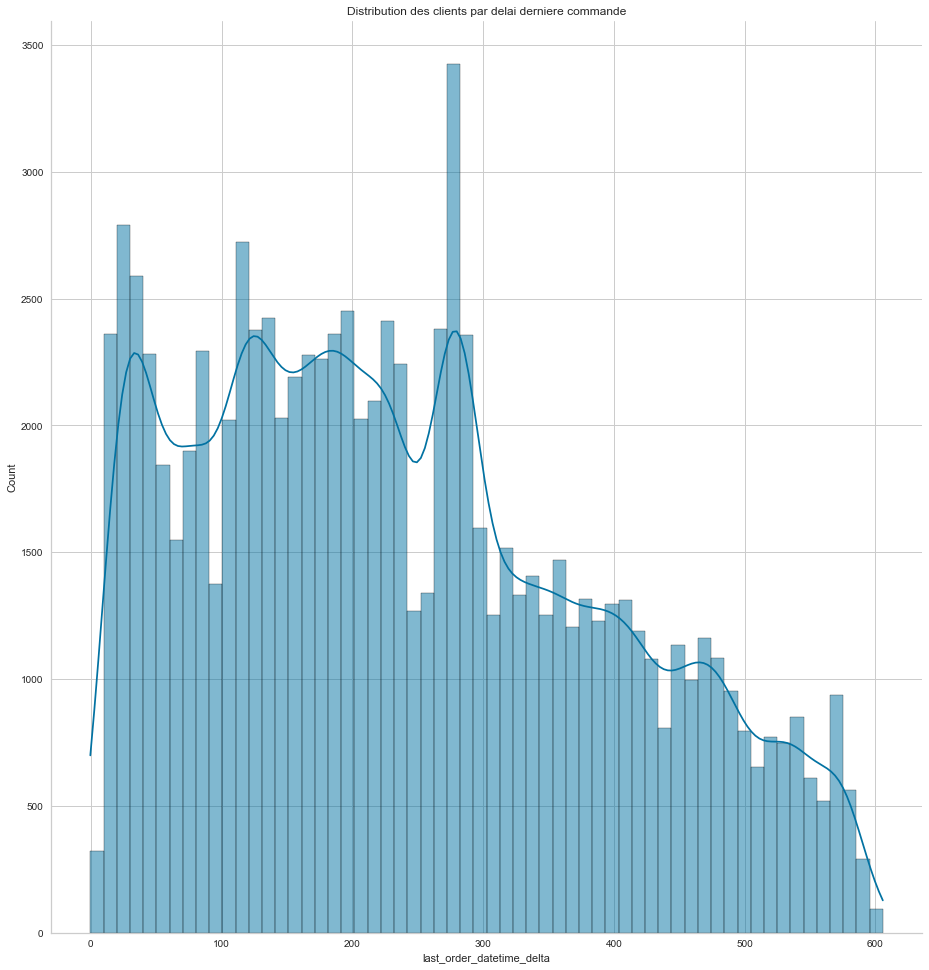

In [ ]:
ax = sns.displot(df_RFM["last_order_datetime_delta"], kde=True).set(
    title="Distribution des clients par delai derniere commande"
)
ax.fig.set_figwidth(15)
ax.fig.set_figheight(15)

## ACP RFM (plus shipping time et review score)

In [ ]:
df_RFM.to_csv("df_RFM.csv")

In [ ]:
df_RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93384 entries, 0 to 93383
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_unique_id         93384 non-null  object 
 1   orders_count               93384 non-null  int64  
 2   payment_value_last         93384 non-null  float64
 3   payment_value_total        93384 non-null  float64
 4   shipping_time_delay        91467 non-null  float64
 5   review_score               93384 non-null  float64
 6   last_order_datetime_delta  93384 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 5.7+ MB


In [ ]:
del df_RFM["payment_value_total"]

In [ ]:
df_RFM

,customer_unique_id,orders_count,payment_value_last,shipping_time_delay,review_score,last_order_datetime_delta
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,-4.132905,5.0,115.913646
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,-4.248125,4.0,118.611956
2,0000f46a3911fa3c0805444483337064,1,86.22,-1.389734,3.0,541.501319
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,-11.108970,4.0,325.512269
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,-7.035463,5.0,292.541725
...,...,...,...,...,...,...
93379,fffcf5a5ff07b0908bd4e2dbc735a684,2,2067.42,-26.609722,5.0,451.494225
93380,fffea47cd6d3cc0a88bd621562a9d061,1,84.58,-2.063657,4.0,266.535150
93381,ffff371b4d645b6ecea244b27531430a,1,112.46,-29.468704,5.0,572.711262
93382,ffff5962728ec6157033ef9805bacc48,1,133.69,-13.503866,5.0,123.714005


In [ ]:
df_RFM[df_RFM.isnull().any(axis=1)]

,customer_unique_id,orders_count,payment_value_last,shipping_time_delay,review_score,last_order_datetime_delta
57,0029bd580d3012618731f5abb174a07f,1,52.38,NaN,2.0,303.195637
231,009a0802534f904b40b9d512b49794e1,1,91.29,NaN,5.0,290.761019
302,00ca7e6a87ceddccce3ff015000be61b,1,55.06,NaN,1.0,167.429606
350,00e872ca2fc94e59982286e69f186e0e,1,420.94,NaN,1.0,385.028970
397,010c88e815c8386129e0762691851850,2,223.44,NaN,1.0,348.997639
...,...,...,...,...,...,...
93263,ffa0ba4c9a6a0763879efe7c2b8d5b93,1,26.12,NaN,1.0,576.890139
93268,ffa652b0cdf8bba29664149a9e579134,1,98.70,NaN,3.0,355.236597
93309,ffc4233210eac4ec1711a8b847196d4e,1,94.77,NaN,4.0,75.741157
93333,ffdde6e4dcb6ec3a882cfc6cddef7996,1,796.94,NaN,1.0,266.817072


In [ ]:
df_RFM.dropna(axis=0, how="any", inplace=True)

In [ ]:
df_RFM = df_RFM.set_index("customer_unique_id")
RFM_values = df_RFM.values

std_scale = StandardScaler().fit(RFM_values)
RFM_values_scaled = std_scale.transform(RFM_values)

In [ ]:
pca = PCA(n_components=3)
pca.fit(RFM_values_scaled)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.25797455 0.22682588 0.19982603]
0.6846264590503195


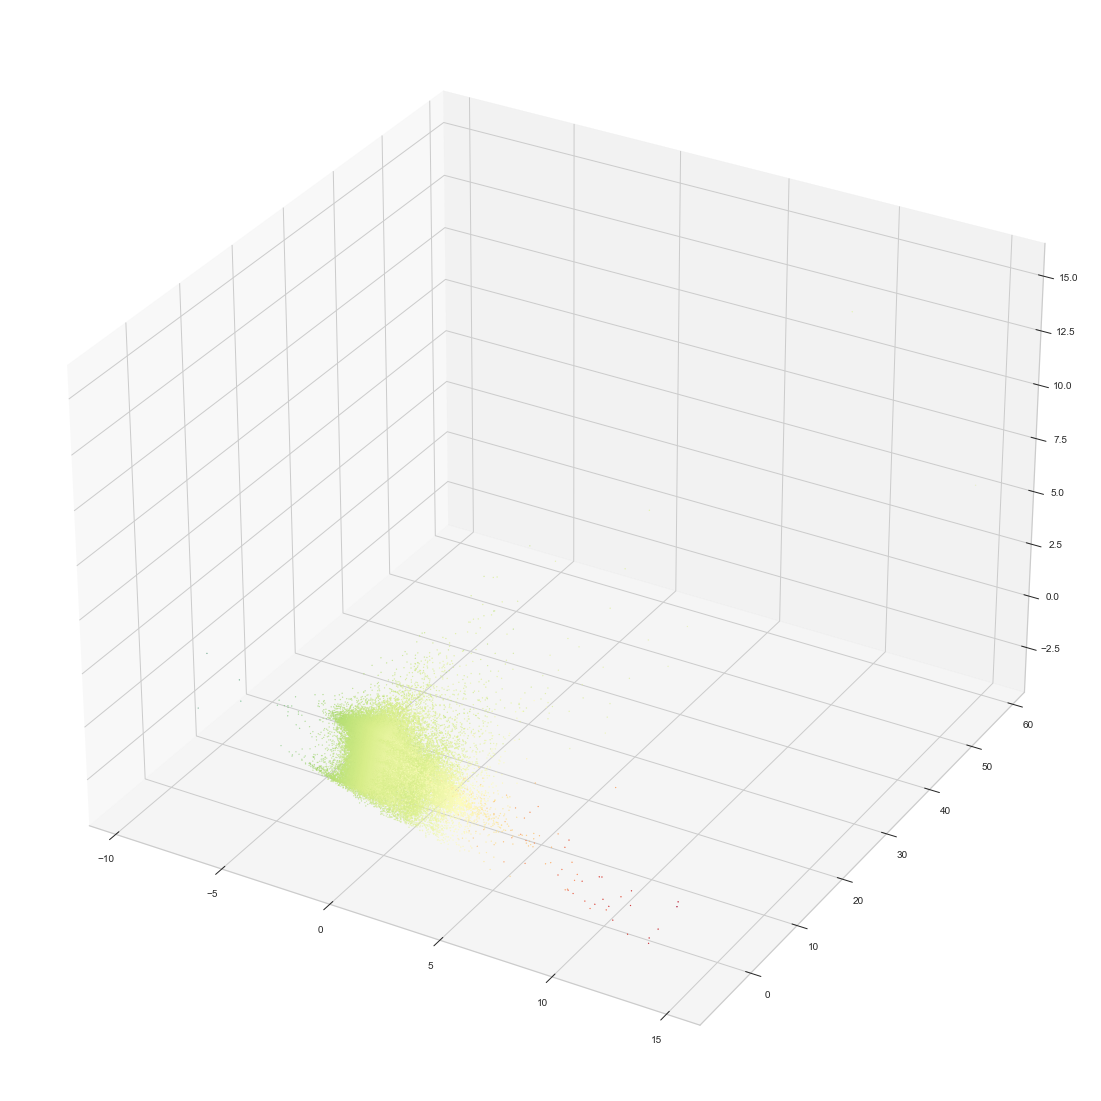

In [ ]:
# projeter X sur les composantes principales
X_projected = pca.transform(RFM_values_scaled)

# afficher chaque observation


fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection="3d")
ax.scatter3D(
    X_projected[:, 0],
    X_projected[:, 1],
    X_projected[:, 2],
    c=df_RFM["shipping_time_delay"],
    s=1,
    cmap="RdYlGn_r",
)

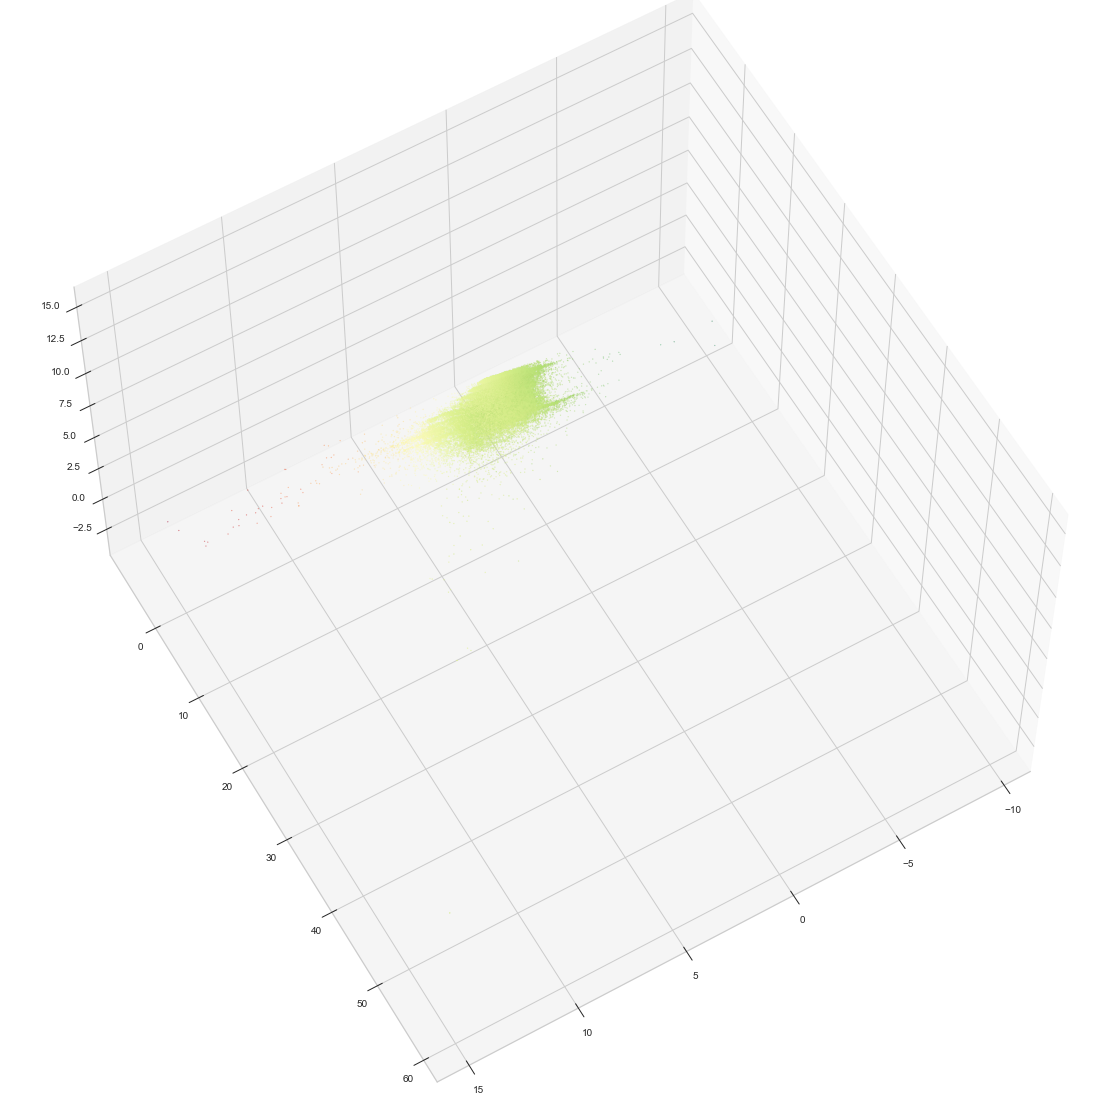

In [ ]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection="3d")
ax.scatter3D(
    X_projected[:, 0],
    X_projected[:, 1],
    X_projected[:, 2],
    c=df_RFM["shipping_time_delay"],
    s=1,
    cmap="RdYlGn_r",
)

ax.view_init(60, 60)

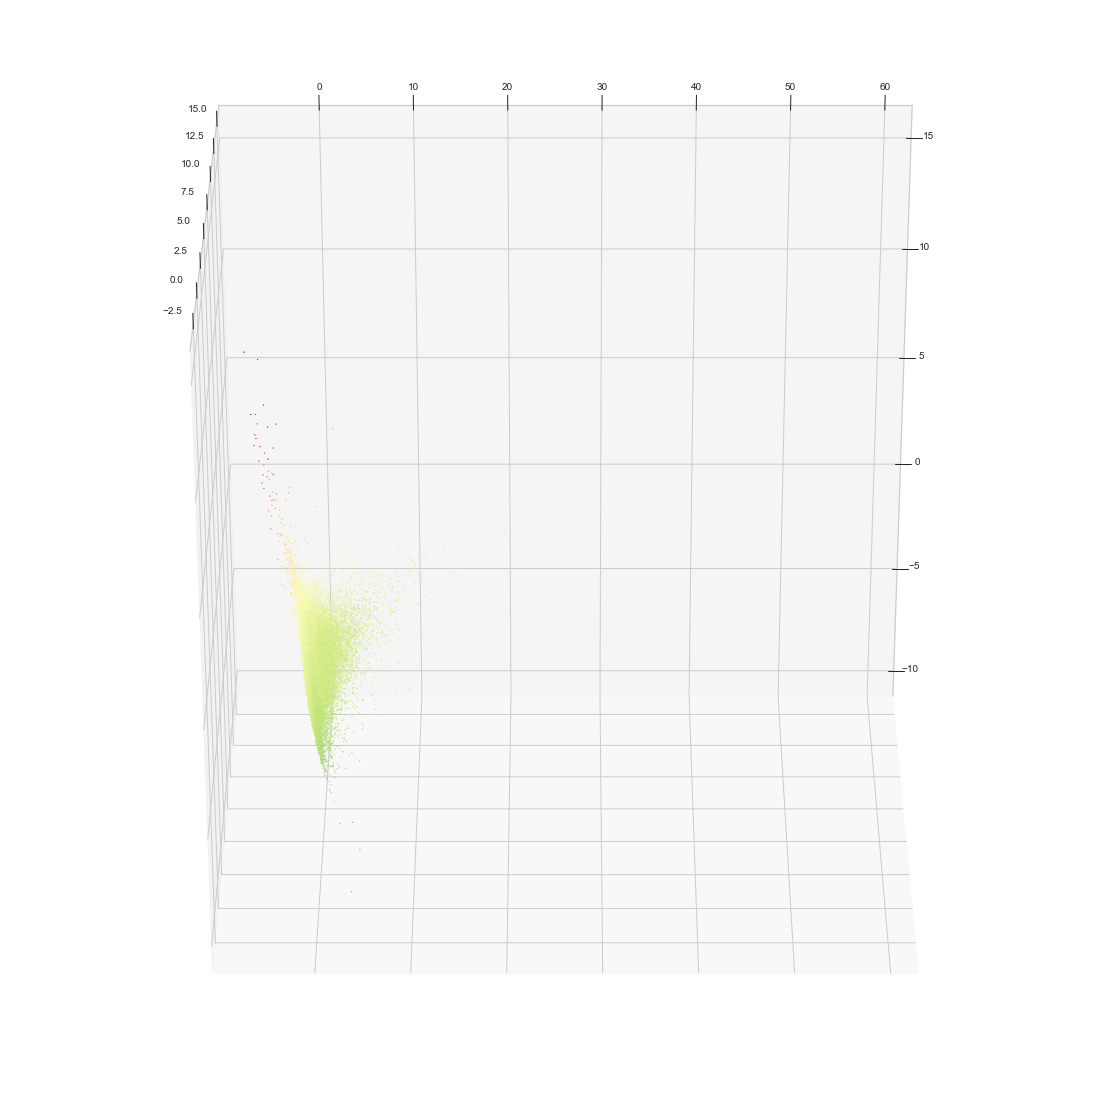

In [ ]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection="3d")
ax.scatter3D(
    X_projected[:, 0],
    X_projected[:, 1],
    X_projected[:, 2],
    c=df_RFM["shipping_time_delay"],
    s=1,
    cmap="RdYlGn_r",
)

ax.view_init(-60, 0)

In [ ]:
from matplotlib.collections import LineCollection


def display_circles(
    pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None
):
    for (d1, d2,) in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7, 6))

            # détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = (
                    min(pcs[d1, :]),
                    max(pcs[d1, :]),
                    min(pcs[d2, :]),
                    max(pcs[d2, :]),
                )

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas
            # le triangle à leur extrémité
            if pcs.shape[1] < 30:
                plt.quiver(
                    np.zeros(pcs.shape[1]),
                    np.zeros(pcs.shape[1]),
                    pcs[d1, :],
                    pcs[d2, :],
                    angles="xy",
                    scale_units="xy",
                    scale=1,
                    color="grey",
                )

            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(
                    LineCollection(lines, axes=ax, alpha=0.1, color="black")
                )

            # affichage des noms des variables
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(
                            x,
                            y,
                            labels[i],
                            fontsize="14",
                            ha="center",
                            va="center",
                            rotation=label_rotation,
                            color="blue",
                            alpha=0.5,
                        )

            # affichage du cercle
            circle = plt.Circle((0, 0), 1, facecolor="none", edgecolor="b")
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color="grey", ls="--")
            plt.plot([0, 0], [-1, 1], color="grey", ls="--")

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel(
                "F{} ({}%)".format(
                    d1 + 1, round(100 * pca.explained_variance_ratio_[d1], 1)
                )
            )
            plt.ylabel(
                "F{} ({}%)".format(
                    d2 + 1, round(100 * pca.explained_variance_ratio_[d2], 1)
                )
            )

            plt.title("Cercle des corrélations (F{} et F{})".format(
                d1 + 1, d2 + 1))
            plt.show(block=False)


def display_factorial_planes(
    X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1,
    illustrative_var=None
):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig = plt.figure(figsize=(7, 6))

            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2],
                            alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(
                        X_projected[selected, d1],
                        X_projected[selected, d2],
                        alpha=alpha,
                        label=value,
                    )
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i, (x, y) in enumerate(X_projected[:, [d1, d2]]):
                    plt.text(x,
                             y,
                             labels[i],
                             fontsize="14",
                             ha="center",
                             va="center")

            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
            plt.xlim([-boundary, boundary])
            plt.ylim([-boundary, boundary])

            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color="grey", ls="--")
            plt.plot([0, 0], [-100, 100], color="grey", ls="--")

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel(
                "F{} ({}%)".format(
                    d1 + 1, round(100 * pca.explained_variance_ratio_[d1], 1)
                )
            )
            plt.ylabel(
                "F{} ({}%)".format(
                    d2 + 1, round(100 * pca.explained_variance_ratio_[d2], 1)
                )
            )

            plt.title(
                "Projection des individus (sur F{} et F{})".format(
                    d1 + 1, d2 + 1)
            )
            plt.show(block=False)


def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_ * 100
    plt.bar(np.arange(len(scree)) + 1, scree)
    plt.plot(np.arange(len(scree)) + 1, scree.cumsum(), c="red", marker="o")
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

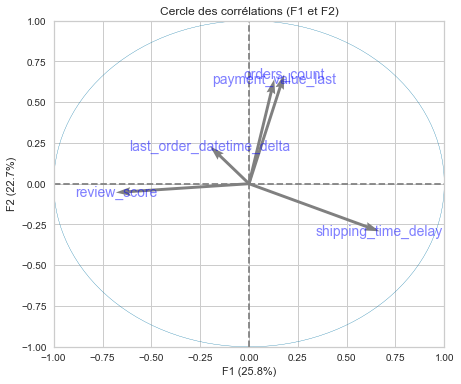

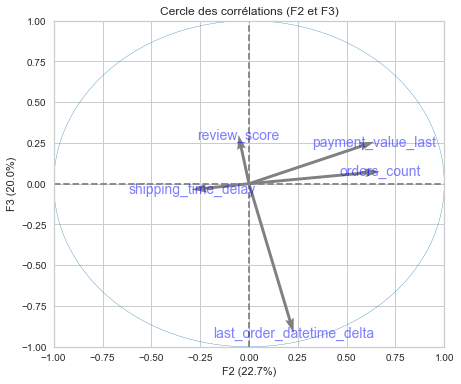

<Figure size 576x396 with 0 Axes>

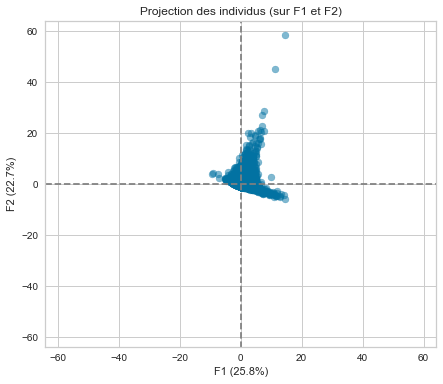

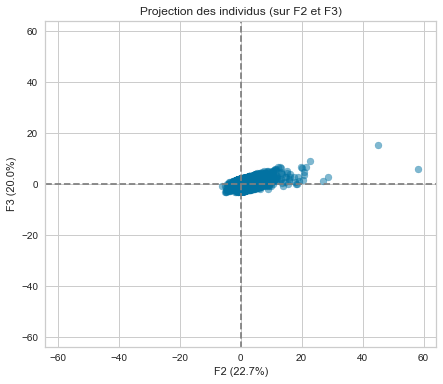

In [ ]:
# Cercle des corrélations

features = df_RFM.columns

n_comp = 3

pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0, 1), (1, 2)], labels=np.array(features))

plt.savefig("cercle_correlation.jpg", format="jpg")

# Projection des individus
RFM_values_scaled_projected = pca.transform(RFM_values_scaled)
display_factorial_planes(
    RFM_values_scaled_projected,
    n_comp,
    pca,
    [(0, 1), (1, 2)],
    illustrative_var=None,
    alpha=0.5,
)

In [ ]:
df_RFM.columns

Index(['orders_count', 'payment_value_last', 'shipping_time_delay',
       'review_score', 'last_order_datetime_delta'],
      dtype='object')

C:\Users\33769\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

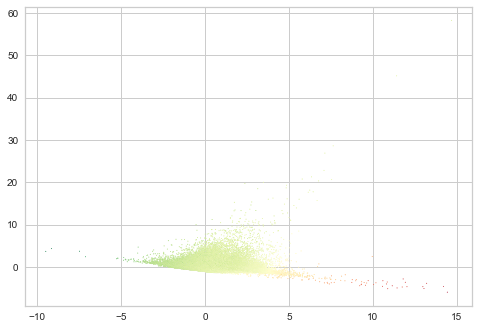

In [ ]:
sns.scatterplot(
    X_projected[:, 0],
    X_projected[:, 1],
    c=df_RFM["shipping_time_delay"],
    s=1,
    cmap="RdYlGn_r",
)

C:\Users\33769\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

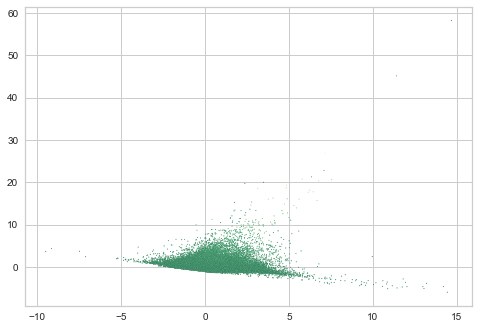

In [ ]:
sns.scatterplot(
    X_projected[:, 0],
    X_projected[:, 1],
    c=df_RFM["orders_count"],
    s=1, cmap="RdYlGn_r"
)

C:\Users\33769\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

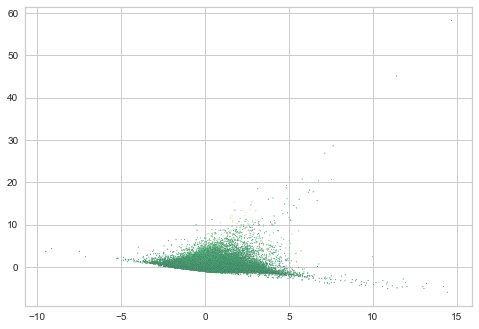

In [ ]:
sns.scatterplot(
    X_projected[:, 0],
    X_projected[:, 1],
    c=df_RFM["payment_value_last"],
    s=1,
    cmap="RdYlGn_r",
)

C:\Users\33769\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

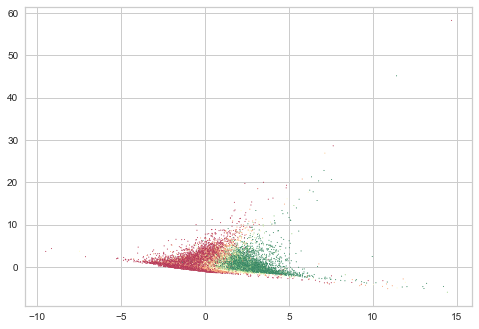

In [ ]:
sns.scatterplot(
    X_projected[:, 0],
    X_projected[:, 1],
    c=df_RFM["review_score"],
    s=1, cmap="RdYlGn_r"
)

## Clustering KMeans

In [ ]:
df_RFM

,orders_count,payment_value_last,shipping_time_delay,review_score,last_order_datetime_delta
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,-4.132905,5.0,115.913646
0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,-4.248125,4.0,118.611956
0000f46a3911fa3c0805444483337064,1,86.22,-1.389734,3.0,541.501319
0000f6ccb0745a6a4b88665a16c9f078,1,43.62,-11.108970,4.0,325.512269
0004aac84e0df4da2b147fca70cf8255,1,196.89,-7.035463,5.0,292.541725
...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,2067.42,-26.609722,5.0,451.494225
fffea47cd6d3cc0a88bd621562a9d061,1,84.58,-2.063657,4.0,266.535150
ffff371b4d645b6ecea244b27531430a,1,112.46,-29.468704,5.0,572.711262


### Elbow

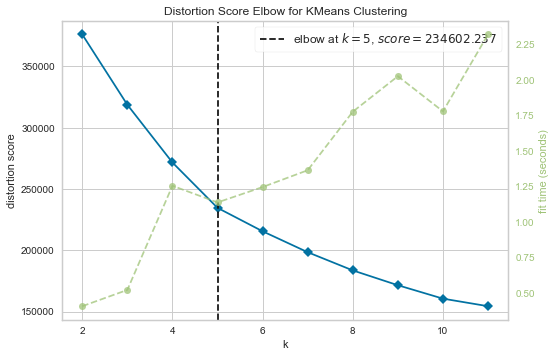

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 12))

visualizer.fit(RFM_values_scaled)  # Fit the data to the visualizer
visualizer.poof()  # Draw/show/poof the data

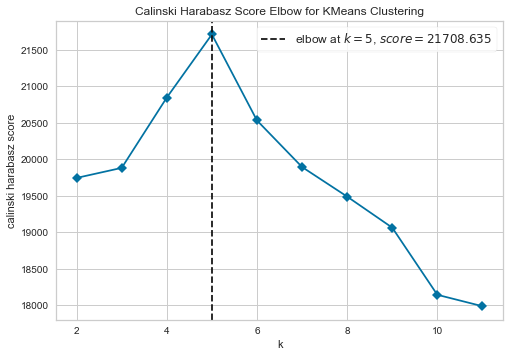

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2, 12), metric="calinski_harabasz", timings=False
)

visualizer.fit(RFM_values_scaled)  # Fit the data to the visualizer
visualizer.poof()  # Draw/show/poof the data

### Silhouette

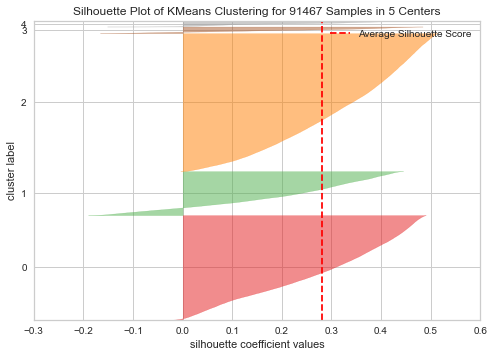

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 91467 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans(5)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(RFM_values_scaled)  # Fit the data to the visualizer
visualizer.poof()  # Draw/show/poof the data

#### Silhouette 4 et 6 clusters pour comparaison

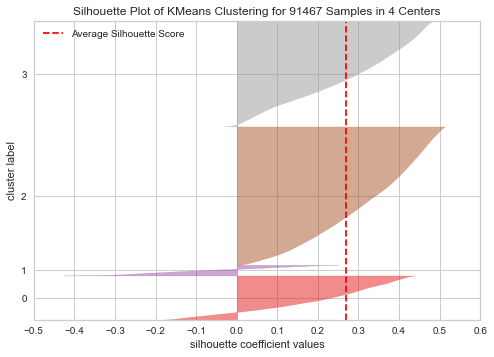

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 91467 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Instantiate the clustering model and visualizer
model_4 = KMeans(4)
visualizer_4 = SilhouetteVisualizer(model_4)

visualizer_4.fit(RFM_values_scaled)  # Fit the data to the visualizer
visualizer_4.poof()  # Draw/show/poof the data

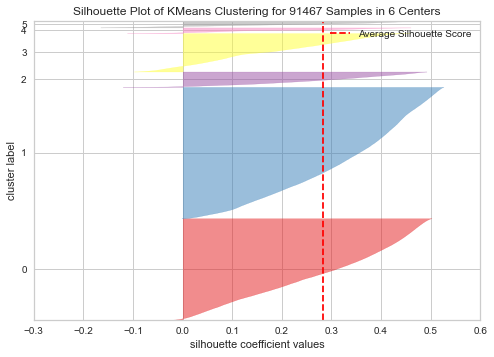

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 91467 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Instantiate the clustering model and visualizer
model_6 = KMeans(6)
visualizer_6 = SilhouetteVisualizer(model_6)

visualizer_6.fit(RFM_values_scaled)  # Fit the data to the visualizer
visualizer_6.poof()  # Draw/show/poof the data

##### Visualisation des clusters

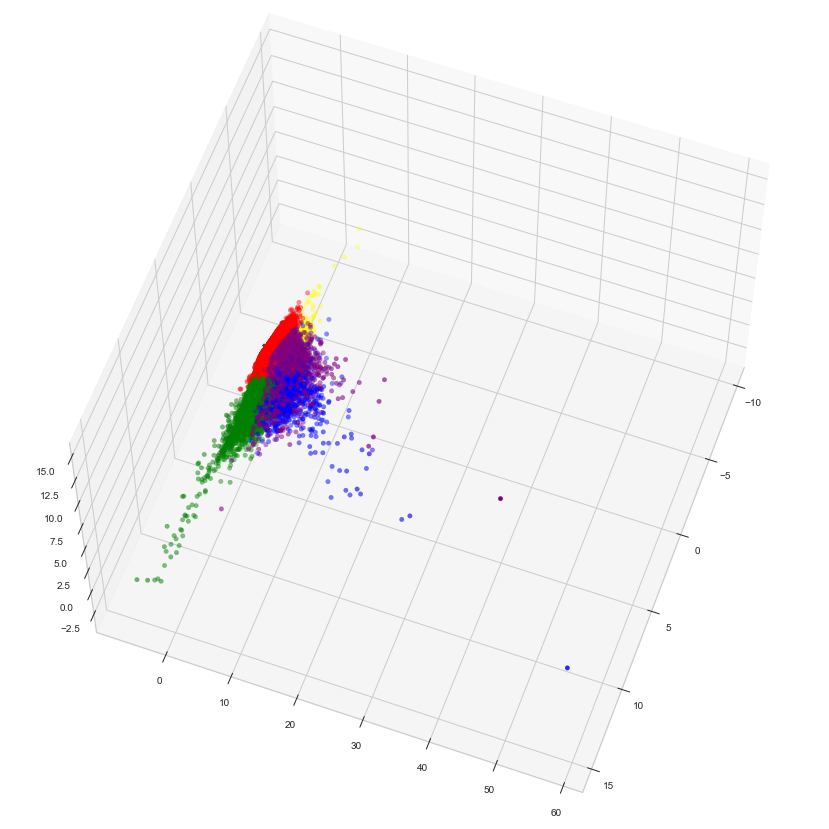

In [ ]:
# %matplotlib notebook
# projeter X sur les composantes principales
X_projected = pca.transform(RFM_values_scaled)

# afficher chaque observation


Kmeans = KMeans(n_clusters=5)
Kmeans.fit(RFM_values_scaled)

colormap = np.array(["Red", "green", "blue", "yellow", "purple"])


# afficher les clusters sur une ACP

fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection="3d")
ax.scatter3D(
    X_projected[:, 0],
    X_projected[:, 1],
    X_projected[:, 2],
    c=colormap[Kmeans.labels_],
    zorder=0,
)


centroids = Kmeans.cluster_centers_

std_scale = StandardScaler().fit(RFM_values_scaled)
centroids_scaled = std_scale.transform(centroids)

centroids_projected = pca.transform(centroids_scaled)

ax.scatter3D(
    centroids_projected[:, 0],
    centroids_projected[:, 1],
    centroids_projected[:, 2],
    marker="x",
    s=300,
    linewidths=3,
    color="black",
    zorder=1,
)
# Show plot
ax.view_init(60, 20)
plt.show()

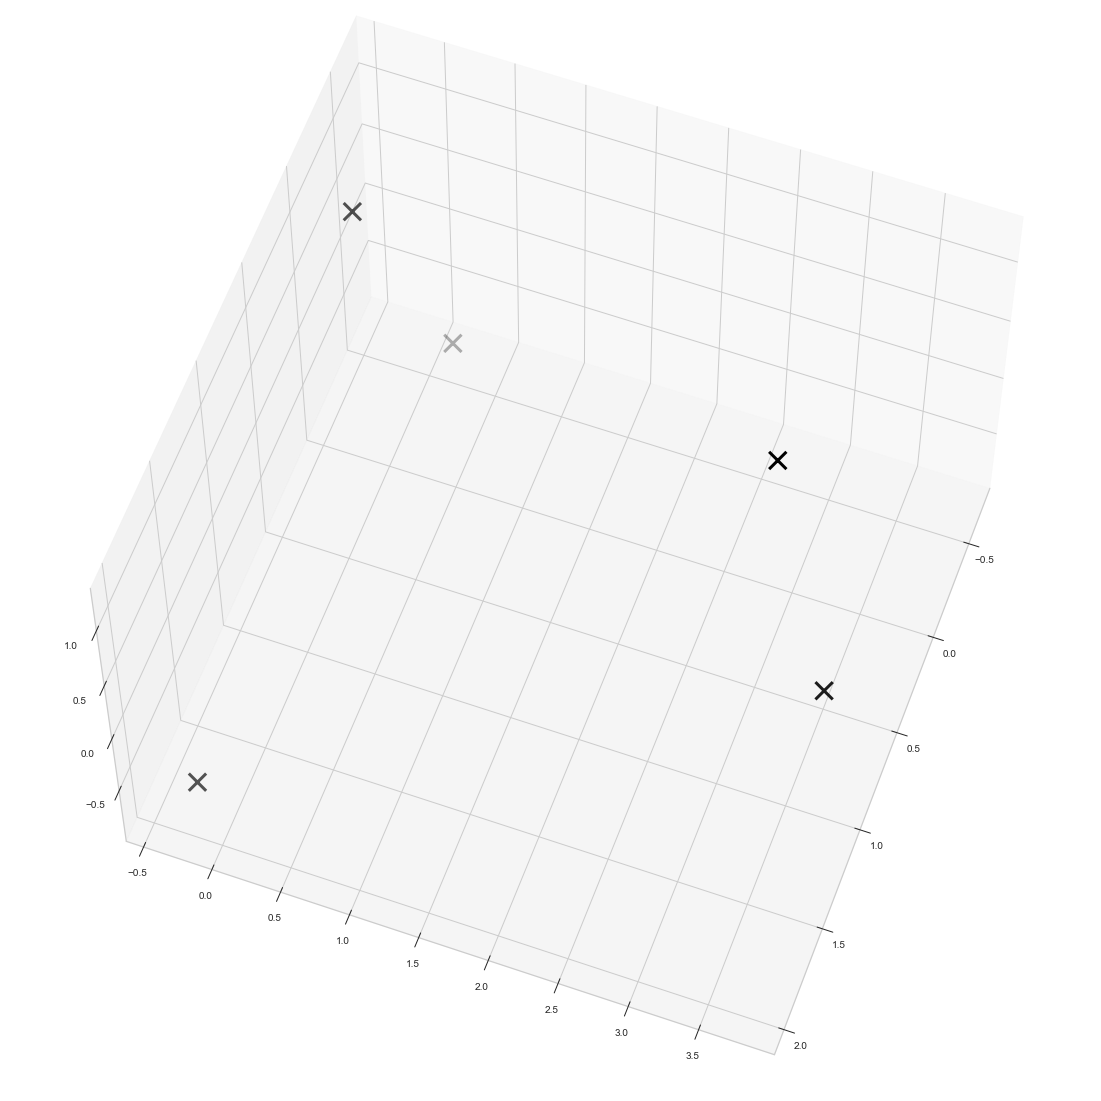

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection="3d")
ax.scatter3D(
    centroids_projected[:, 0],
    centroids_projected[:, 1],
    centroids_projected[:, 2],
    marker="x",
    s=300,
    linewidths=3,
    color="black",
    zorder=1,
)
ax.view_init(60, 20)
plt.show()

#### Caracteristique des clusters

In [ ]:
cluster_kmeans = Kmeans.labels_.tolist()

In [ ]:
df_resultats_Kmean = pd.DataFrame(
    {"Cluster Kmeans": cluster_kmeans}, columns=["Cluster Kmeans"], index=df_RFM.index
)
df_RFM = df_RFM.reset_index()
df_resultats_Kmean

,Cluster Kmeans
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,0
0000b849f77a49e4a4ce2b2a4ca5be3f,0
0000f46a3911fa3c0805444483337064,3
0000f6ccb0745a6a4b88665a16c9f078,3
0004aac84e0df4da2b147fca70cf8255,3
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,4
fffea47cd6d3cc0a88bd621562a9d061,0
ffff371b4d645b6ecea244b27531430a,3


In [ ]:
df_resultats_Kmean = df_resultats_Kmean.reset_index()
df_resultat_kmeans = pd.merge(
    df_RFM, df_resultats_Kmean, how="left", on="customer_unique_id", indicator=True
)
df_resultat_kmeans

,customer_unique_id,orders_count,payment_value_last,shipping_time_delay,review_score,last_order_datetime_delta,Cluster Kmeans,_merge
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,-4.132905,5.0,115.913646,0,both
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,-4.248125,4.0,118.611956,0,both
2,0000f46a3911fa3c0805444483337064,1,86.22,-1.389734,3.0,541.501319,3,both
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,-11.108970,4.0,325.512269,3,both
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,-7.035463,5.0,292.541725,3,both
...,...,...,...,...,...,...,...,...
91462,fffcf5a5ff07b0908bd4e2dbc735a684,2,2067.42,-26.609722,5.0,451.494225,4,both
91463,fffea47cd6d3cc0a88bd621562a9d061,1,84.58,-2.063657,4.0,266.535150,0,both
91464,ffff371b4d645b6ecea244b27531430a,1,112.46,-29.468704,5.0,572.711262,3,both
91465,ffff5962728ec6157033ef9805bacc48,1,133.69,-13.503866,5.0,123.714005,0,both


In [ ]:
df_resultat_kmeans["_merge"].value_counts()

both          91467
left_only         0
right_only        0
Name: _merge, dtype: int64

In [ ]:
del df_resultat_kmeans["_merge"]

In [ ]:
df_resultat_kmeans.to_csv("df_resultat_kmeans.csv")

In [ ]:
pd_effectif = pd.DataFrame(
    df_resultat_kmeans["Cluster Kmeans"].value_counts()
).sort_index()
pd_effectif.rename(columns={"Cluster Kmeans": "Effectif"}, inplace=True)
pd_effectif

,Effectif
0,42142
1,13450
2,1726
3,32106
4,2043


<AxesSubplot:xlabel='Cluster Kmeans'>

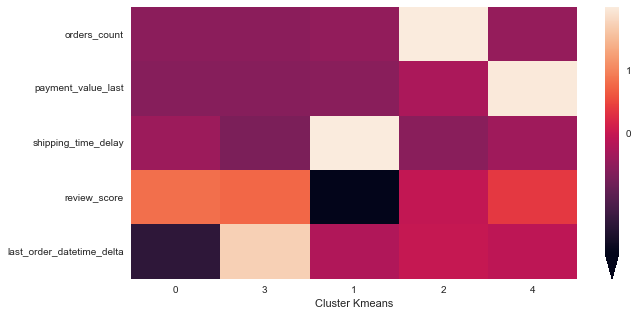

In [ ]:
df_resultats = (
    df_resultat_kmeans.groupby(["Cluster Kmeans"])
    .mean()
    .sort_values(by="payment_value_last")
)
resultats_data = df_resultats.values
std_scale = StandardScaler().fit(resultats_data)
resultats_data_scaled = std_scale.transform(resultats_data)

df_resultats_data_scaled = pd.DataFrame(resultats_data_scaled)
df_resultats_data_scaled.columns = df_resultats.columns
df_resultats_data_scaled.index = df_resultats.index

fig, ax = plt.subplots(figsize=(10, 5))

cbar_kws = {
    "orientation": "vertical",
    "shrink": 1,
    "extend": "min",
    "extendfrac": 0.1,
    "ticks": np.arange(0, 22),
}

sns.heatmap(df_resultats_data_scaled.T, cbar_kws=cbar_kws)

In [ ]:
df_resultats_data_scaled.T

Cluster Kmeans,0,3,1,2,4
orders_count,-0.538635,-0.535432,-0.472392,1.998844,-0.452385
payment_value_last,-0.592856,-0.592771,-0.552465,-0.244830,1.982923
shipping_time_delay,-0.387887,-0.680352,1.986091,-0.561108,-0.356744
review_score,0.812198,0.754666,-1.905483,-0.033935,0.372554
last_order_datetime_delta,-1.423899,1.710511,-0.198005,-0.002275,-0.086332


In [ ]:
df_polar = df_resultats_data_scaled.T.copy()
df_polar_add = df_polar[:1]
df_polar = pd.concat([df_polar, df_polar_add], ignore_index=False)
df_polar

Cluster Kmeans,0,3,1,2,4
orders_count,-0.538635,-0.535432,-0.472392,1.998844,-0.452385
payment_value_last,-0.592856,-0.592771,-0.552465,-0.244830,1.982923
shipping_time_delay,-0.387887,-0.680352,1.986091,-0.561108,-0.356744
review_score,0.812198,0.754666,-1.905483,-0.033935,0.372554
last_order_datetime_delta,-1.423899,1.710511,-0.198005,-0.002275,-0.086332
orders_count,-0.538635,-0.535432,-0.472392,1.998844,-0.452385


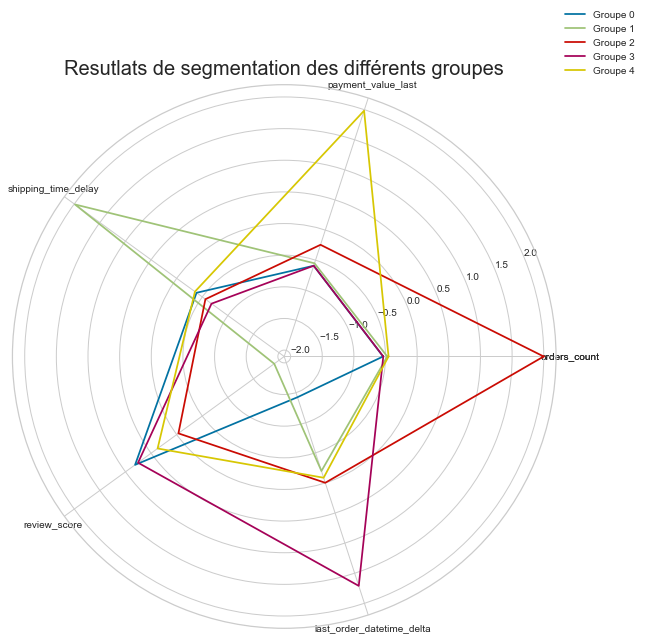

In [ ]:
label_placement = np.linspace(start=0, stop=2 * np.pi, num=6)
plt.figure(figsize=(10, 10))
plt.subplot(polar=True)
plt.plot(label_placement, df_polar[0].tolist(), label="Groupe 0")
plt.plot(label_placement, df_polar[1].tolist(), label="Groupe 1")
plt.plot(label_placement, df_polar[2].tolist(), label="Groupe 2")
plt.plot(label_placement, df_polar[3].tolist(), label="Groupe 3")
plt.plot(label_placement, df_polar[4].tolist(), label="Groupe 4")
lines, labels = plt.thetagrids(
    np.degrees(label_placement), labels=df_polar.index.tolist()
)
plt.title("Resutlats de segmentation des différents groupes", fontdict={"fontsize": 20})
plt.legend(loc="lower left", bbox_to_anchor=(1, 1))

In [ ]:
df_resultats_describe = df_resultat_kmeans.groupby(["Cluster Kmeans"]).describe()
df_resultats_describe.T

Cluster Kmeans                              0             1            2  \
orders_count              count  42142.000000  13450.000000  1726.000000   
                          mean       1.136064      1.248476     5.442063   
                          std        0.392250      0.518495     3.228649   
                          min        1.000000      1.000000     3.000000   
                          25%        1.000000      1.000000     4.000000   
                          50%        1.000000      1.000000     4.000000   
                          75%        1.000000      1.000000     6.000000   
                          max        3.000000      4.000000    75.000000   
payment_value_last        count  42142.000000  13450.000000  1726.000000   
                          mean     131.302062    147.960236   274.834618   
                          std      105.631893    123.470537   268.734473   
                          min        7.320000     13.890000     4.070000   
                          25%       59.150000     65.100000   100.000000   
                          50%      100.925000    110.770000   199.990000   
                          75%      166.350000    187.320000   355.192500   
                          max      703.060000    984.260000  2234.660000   
shipping_time_delay       count  42142.000000  13450.000000  1726.000000   
                          mean     -12.192588     -2.502004   -12.899678   
                          std        7.824673     15.625301     8.752698   
                          min      -70.182847    -46.988322   -70.450035   
                          25%      -16.423377    -12.107821   -17.250874   
                          50%      -12.060174     -5.367830   -12.839468   
                          75%       -7.008634      5.415006    -8.080223   
                          max       33.697731    188.975081    26.547755   
review_score              count  42142.000000  13450.000000  1726.000000   
                          mean       4.651690      1.615204     3.706299   
                          std        0.589579      0.847323     1.508853   
                          min        1.000000      1.000000     1.000000   
                          25%        4.000000      1.000000     3.000000   
                          50%        5.000000      1.000000     4.000000   
                          75%        5.000000      2.000000     5.000000   
                          max        5.000000      5.000000     5.000000   
last_order_datetime_delta count  42142.000000  13450.000000  1726.000000   
                          mean     126.892692    231.120571   247.761980   
                          std       72.342268    126.938962   154.357440   
                          min        4.747581      4.855324     5.001933   
                          25%       63.998686    150.237355   121.418860   
                          50%      124.846910    210.399491   225.855480   
                          75%      188.741340    290.230032   357.560295   
                          max      285.857917    604.344931   604.390845   

Cluster Kmeans                              3             4  
orders_count              count  32106.000000   2043.000000  
                          mean       1.141500      1.282428  
                          std        0.398415      0.744565  
                          min        1.000000      1.000000  
                          25%        1.000000      1.000000  
                          50%        1.000000      1.000000  
                          75%        1.000000      1.000000  
                          max        3.000000     10.000000  
payment_value_last        count  32106.000000   2043.000000  
                          mean     131.337192   1193.602296  
                          std      107.349440    671.499354  
                          min        7.020000    654.410000  
                          25%       60.055000    811.510000  
               

## Segmentation par classification ascendante hierarchique et DBscan sur une partie des données.

**Les données ne sont pas adaptées à une segmentation par classification ascendante hierarchique ou DBscan (ou ma puissance de calcul n'est pas suffisante) nous allons effectuer une segmentation avec ces methodes sur une partie des données.**

### Classification ascendante hierarchique

In [ ]:
df_RFM_40 = df_RFM.sample(frac=0.4, axis=0)
df_RFM_40.set_index("customer_unique_id", inplace=True)
df_RFM_40_values = df_RFM_40.values
std_scale = StandardScaler().fit(df_RFM_40_values)
df_RFM_40_values_scaled = std_scale.transform(df_RFM_40_values)

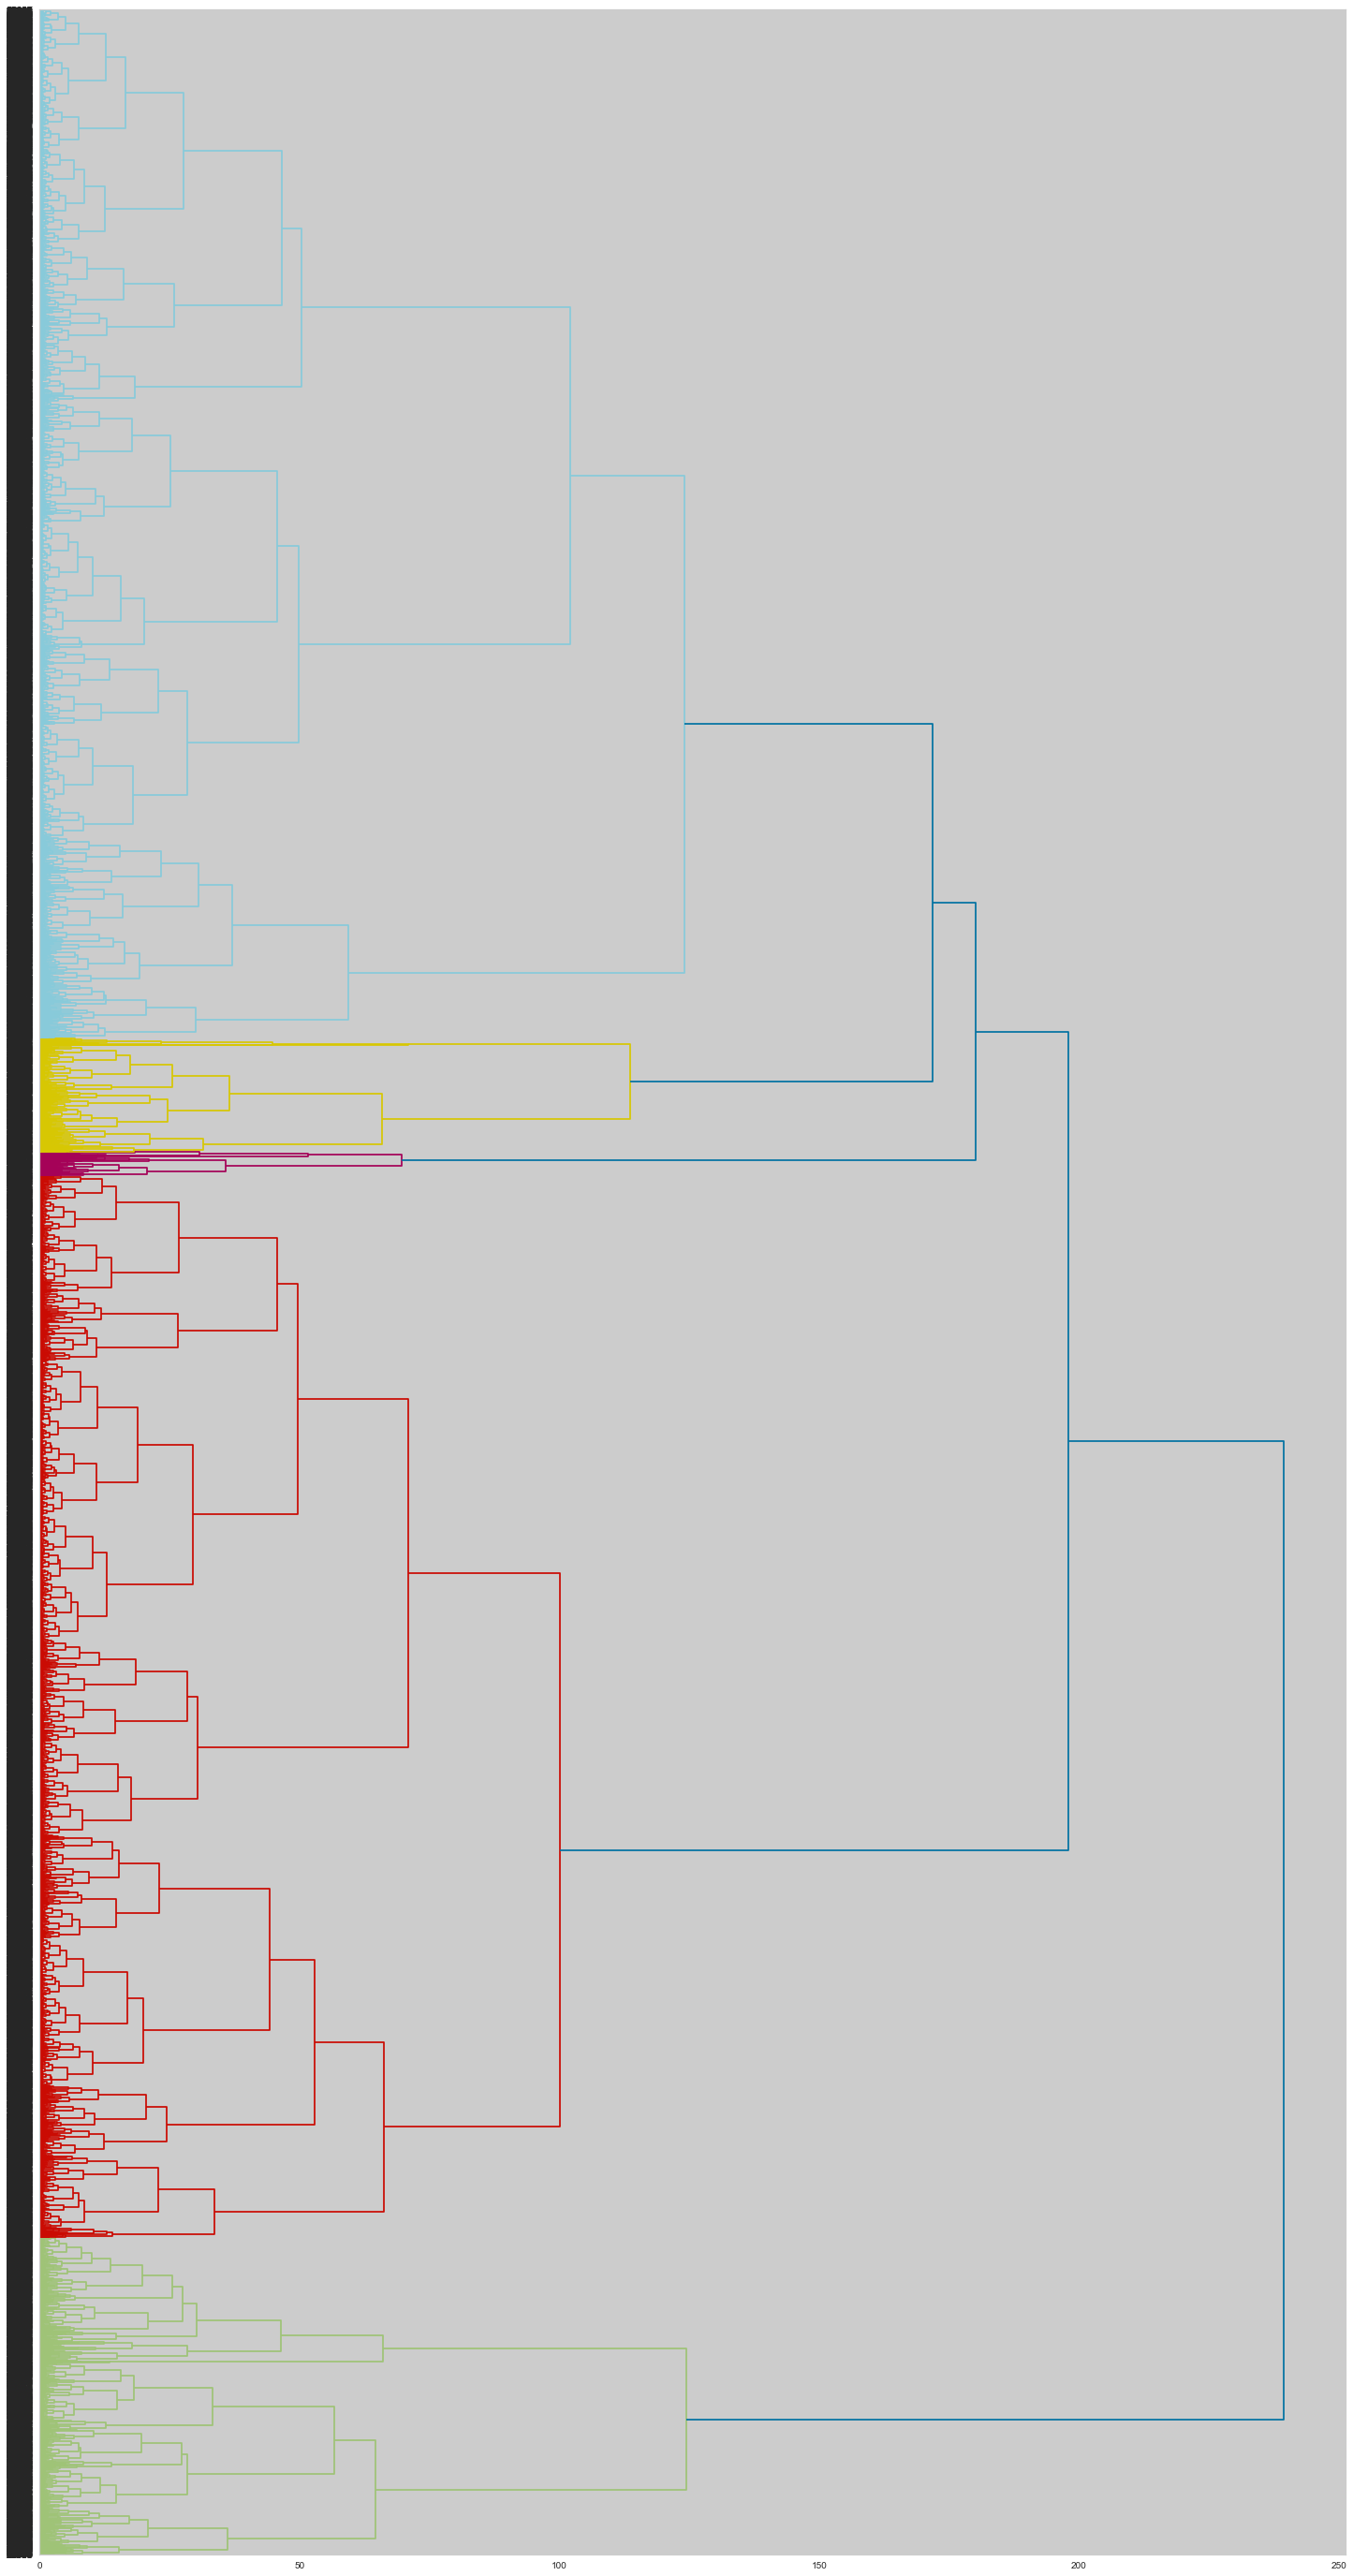

Wall time: 3min 50s


In [ ]:
%%time
merg = linkage(df_RFM_40_values_scaled, method = 'ward')
fig = plt.figure(figsize=(25, 50))

dendrogram(merg, leaf_font_size = 10, orientation = 'right')

plt.show()

In [ ]:
%%time
# Coupage du dendrogramme en 5 clusters (Choix visuel)

clusters = fcluster(merg, 5, criterion='maxclust')


Wall time: 115 ms


In [ ]:
# Dataframe des clusters trouvés

df_resultat_CAH = pd.DataFrame({"Cluster": clusters, "title": df_RFM_40.index})
df_resultat_CAH.rename(columns={"title": "customer_unique_id"}, inplace=True)
df_resultat_CAH = df_resultat_CAH.set_index("customer_unique_id")
df_RFM_40.reset_index(inplace=True)
df_resultat_CAH = pd.merge(
    df_RFM_40, df_resultat_CAH, how="left", on="customer_unique_id", indicator=True
)
df_resultat_CAH

,customer_unique_id,orders_count,payment_value_last,shipping_time_delay,review_score,last_order_datetime_delta,Cluster,_merge
0,5523da98302d120b592f376ef5b3766f,1,147.16,-14.054271,5.0,370.883137,2,both
1,c99795de9de4007080efcecef5e67ef0,1,71.39,-19.265394,5.0,50.660914,5,both
2,94e8e9f7feacb6478fa2b9c6b3293749,1,203.23,0.717488,5.0,116.201620,5,both
3,5cbfdb85ec130898108b32c50d619c39,3,162.02,-3.100436,5.0,171.223206,5,both
4,f4ce8d9deb6f54490b66f1013e9be01e,1,56.60,-1.169005,5.0,29.835266,5,both
...,...,...,...,...,...,...,...,...
36582,d9633788fcebca588097b7b353231eba,2,28.23,-12.306296,5.0,46.771968,5,both
36583,770be8981d9f2d66bc74ae7e96180caf,1,217.83,-26.071863,5.0,251.732917,2,both
36584,e2c40c8b0afea459059e4f2b8d22b6f0,1,251.59,-23.468148,2.0,398.799711,2,both
36585,ac09ed646d92eb26c2fb2365f45e672c,1,77.57,-9.158611,4.0,304.368958,2,both


In [ ]:
df_resultat_CAH["_merge"].value_counts()

both          36587
left_only         0
right_only        0
Name: _merge, dtype: int64

In [ ]:
del df_resultat_CAH["_merge"]

In [ ]:
pd_effectif_CAH = pd.DataFrame(df_resultat_CAH["Cluster"].value_counts()).sort_index()
pd_effectif_CAH.rename(columns={"Cluster": "Effectif"}, inplace=True)
pd_effectif_CAH

,Effectif
1,4562
2,15263
3,338
4,1641
5,14783


<AxesSubplot:xlabel='Cluster'>

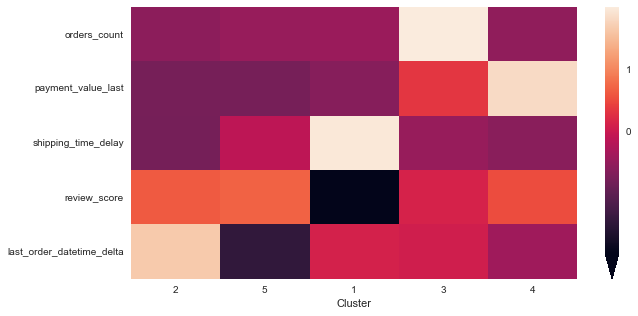

In [ ]:
df_resultats_clusters_CAH = (
    df_resultat_CAH.groupby(["Cluster"]).mean().sort_values(by="payment_value_last")
)
resultats_clusters_CAH_data = df_resultats_clusters_CAH.values
std_scale = StandardScaler().fit(resultats_clusters_CAH_data)
resultats_clusters_CAH_data_scaled = std_scale.transform(resultats_clusters_CAH_data)

df_resultats_clusters_CAH_data_scaled = pd.DataFrame(resultats_clusters_CAH_data_scaled)
df_resultats_clusters_CAH_data_scaled.columns = df_resultats_clusters_CAH.columns
df_resultats_clusters_CAH_data_scaled.index = df_resultats_clusters_CAH.index

fig, ax = plt.subplots(figsize=(10, 5))

cbar_kws = {
    "orientation": "vertical",
    "shrink": 1,
    "extend": "min",
    "extendfrac": 0.1,
    "ticks": np.arange(0, 22),
}

sns.heatmap(df_resultats_clusters_CAH_data_scaled.T, cbar_kws=cbar_kws)

In [ ]:
df_resultats_clusters_CAH_data_scaled.T

Cluster,2,5,1,3,4
orders_count,-0.557859,-0.467686,-0.436032,1.998037,-0.536460
payment_value_last,-0.765130,-0.758089,-0.630576,0.327619,1.826176
shipping_time_delay,-0.777361,-0.108722,1.951654,-0.472725,-0.592845
review_score,0.625381,0.687810,-1.962452,0.132503,0.516758
last_order_datetime_delta,1.655971,-1.443771,0.114986,0.067210,-0.394396


In [ ]:
df_resultats_clusters_CAH

,orders_count,payment_value_last,shipping_time_delay,review_score,last_order_datetime_delta
Cluster,,,,,
2,1.068859,120.576182,-13.602864,4.534069,356.166117
5,1.264019,122.497221,-11.034049,4.610504,123.787111
1,1.332530,157.289270,-3.118382,1.365651,240.642783
3,6.600592,418.733314,-12.432496,3.930613,237.061105
4,1.115174,827.615673,-12.893981,4.401077,202.455845


### Clustering DBSCAN

In [ ]:
df_RFM_40 = df_RFM.sample(frac=0.4, axis=0)
df_RFM_40.set_index("customer_unique_id", inplace=True)
RFM_40_values = df_RFM_40.values
std_scale = StandardScaler().fit(RFM_40_values)
RFM_40_values_scaled = std_scale.transform(RFM_40_values)

In [ ]:
%%time
Dbscan = DBSCAN(eps=1, min_samples=6).fit(RFM_40_values_scaled)

In [ ]:
# Visualisation des clusters

pca = PCA(n_components=3)
pca.fit(RFM_40_values_scaled)

X_projected = pca.transform(RFM_40_values_scaled)

fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection="3d")
ax.scatter3D(
    X_projected[:, 0],
    X_projected[:, 1],
    X_projected[:, 2],
    c=[Dbscan.labels_],
    cmap="RdYlGn_r",
)

# Show plot
ax.view_init(0, 20)
plt.show()

In [ ]:
df_RFM_40["Dbscan_clusters"] = Dbscan.labels_

In [ ]:
df_RFM_40["Dbscan_clusters"].nunique()

In [ ]:
df_resultat_DB = df_RFM_40.copy()

In [ ]:
df_effectif_DB = pd.DataFrame(
    df_resultat_DB["Dbscan_clusters"].value_counts()
).sort_index()
df_effectif_DB.rename(columns={"Dbscan_clusters": "Effectif"}, inplace=True)
df_effectif_DB

In [ ]:
df_resultats_clusters_DB = (
    df_resultat_DB.groupby(["Dbscan_clusters"])
    .mean()
    .sort_values(by="payment_value_last")
)
resultats_clusters_DB_data = df_resultats_clusters_DB.values
std_scale = StandardScaler().fit(resultats_clusters_DB_data)
resultats_clusters_DB_data_scaled = std_scale.transform(resultats_clusters_DB_data)

df_resultats_clusters_DB_data_scaled = pd.DataFrame(resultats_clusters_DB_data_scaled)
df_resultats_clusters_DB_data_scaled.columns = df_resultats_clusters_DB.columns
df_resultats_clusters_DB_data_scaled.index = df_resultats_clusters_DB.index

fig, ax = plt.subplots(figsize=(10, 5))

cbar_kws = {
    "orientation": "vertical",
    "shrink": 1,
    "extend": "min",
    "extendfrac": 0.1,
    "ticks": np.arange(0, 22),
}

sns.heatmap(df_resultats_clusters_DB_data_scaled.T, cbar_kws=cbar_kws)

**Les resultats de segmentation pas DBscan ne sont pas interessant et cette methode ne semble pas adaptée à ces données**